# Redes neuronales

### LIBRERIAS

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report



### Preprosesamiento de los datos

In [56]:
df = pd.read_csv('onc_train_full_with_target.csv')


In [57]:
df.shape

(40000, 91)

In [58]:
# crea dos dataframes, uno con las caracteristicas y otro con la variable objetivo

X = df.drop('vive', axis=1)
y = df['vive']

# divide X en numericas y categoricas creando dos dataframes
X_num = X.select_dtypes(include=['int64', 'float64'])

X_cat = X.select_dtypes(include=['object', 'category'])



# EDA

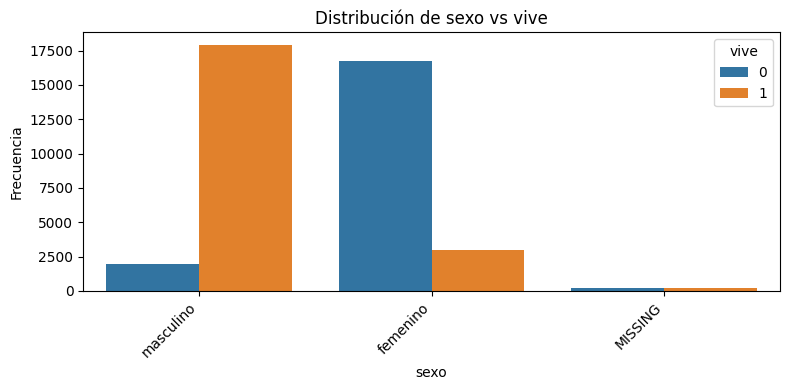

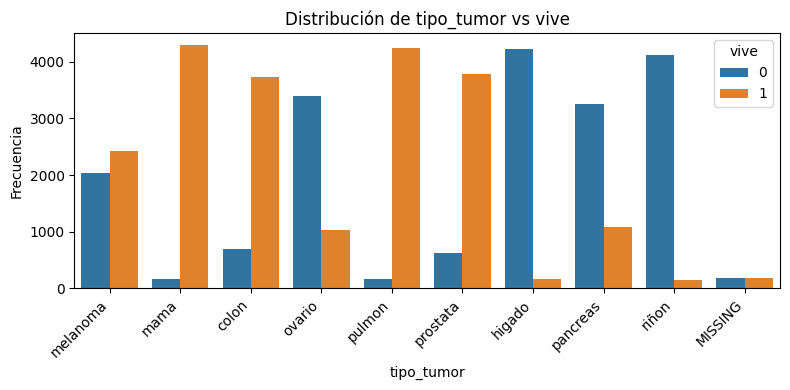

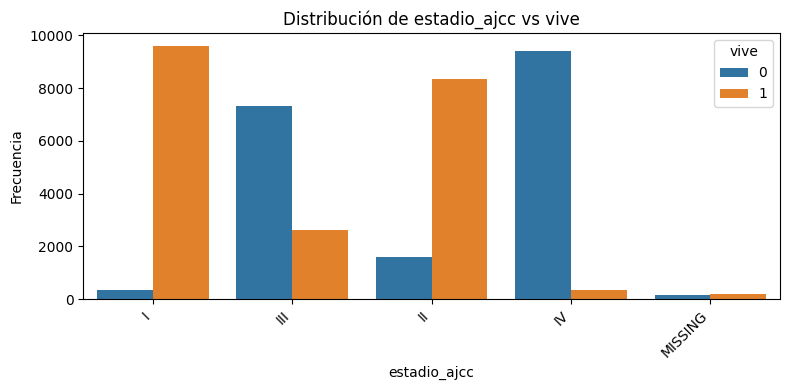

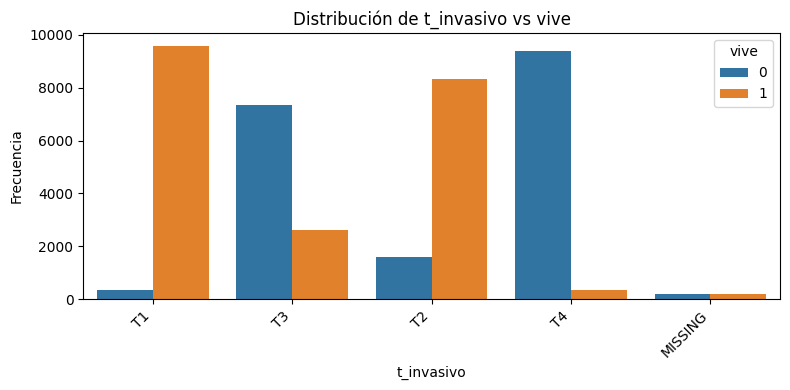

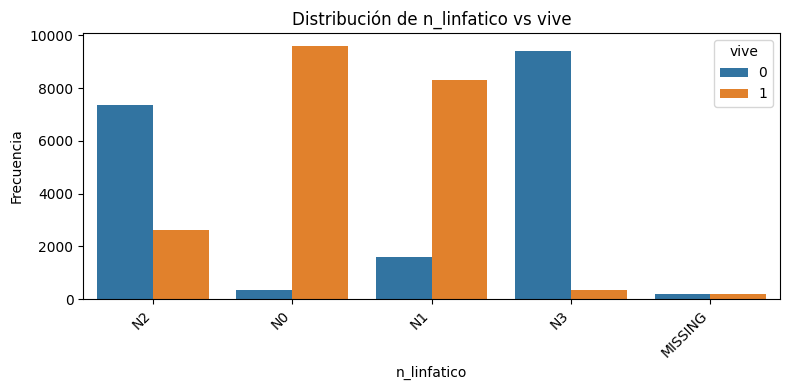

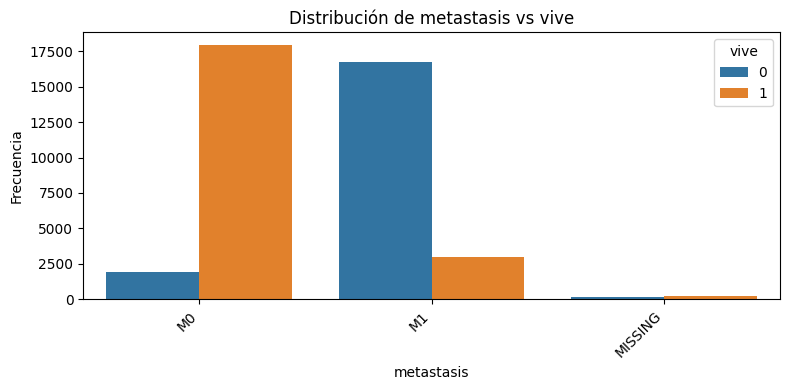

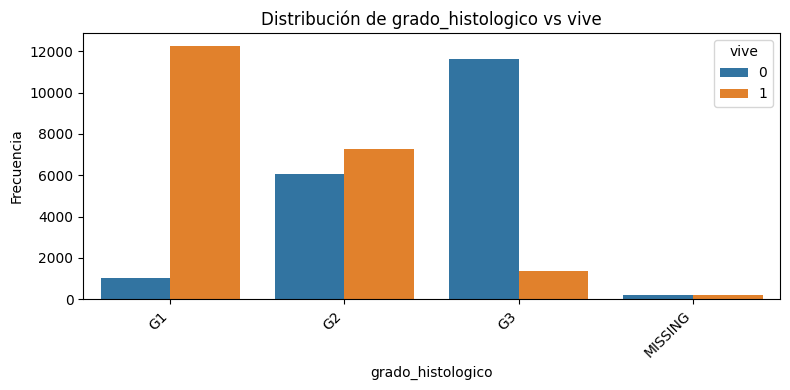

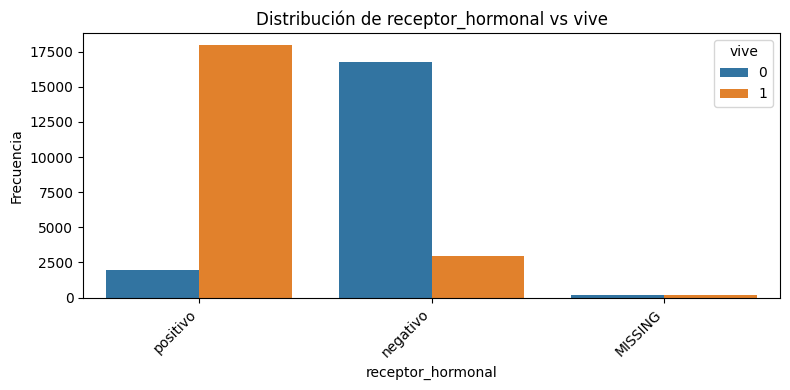

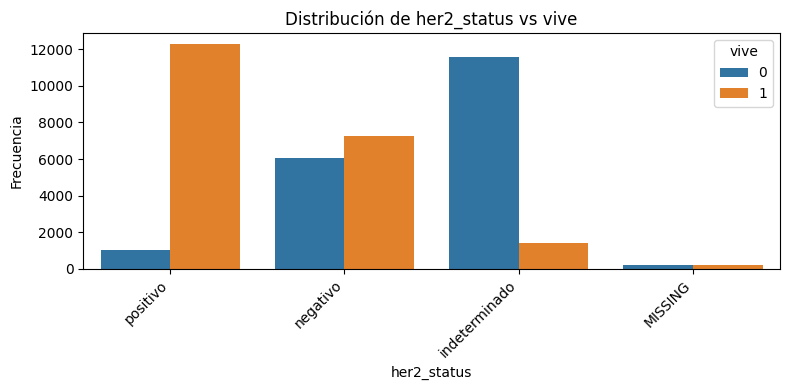

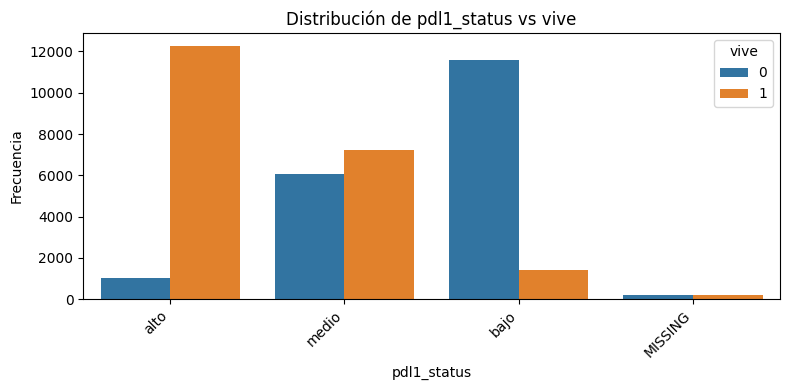

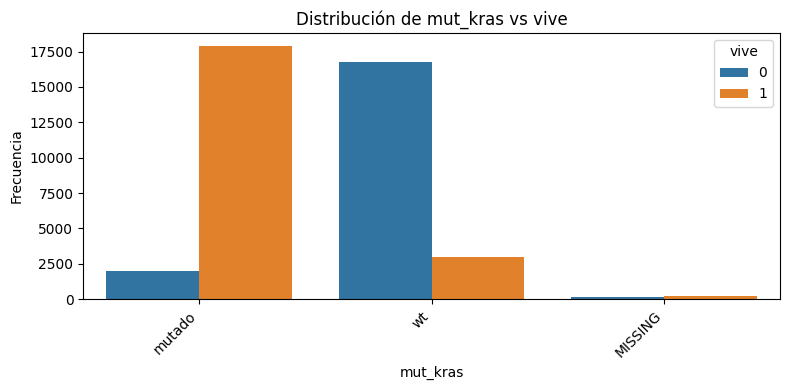

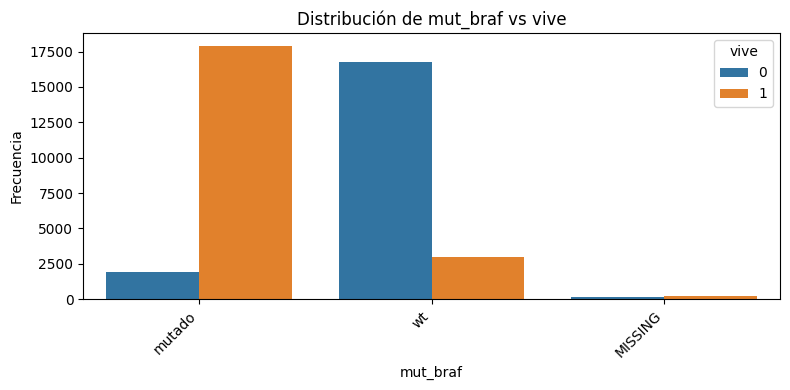

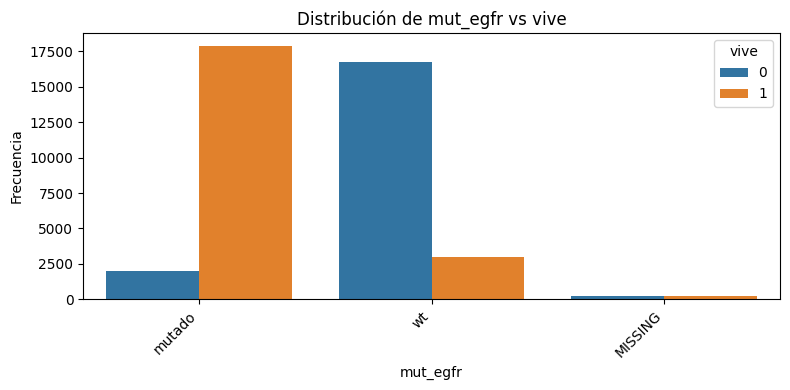

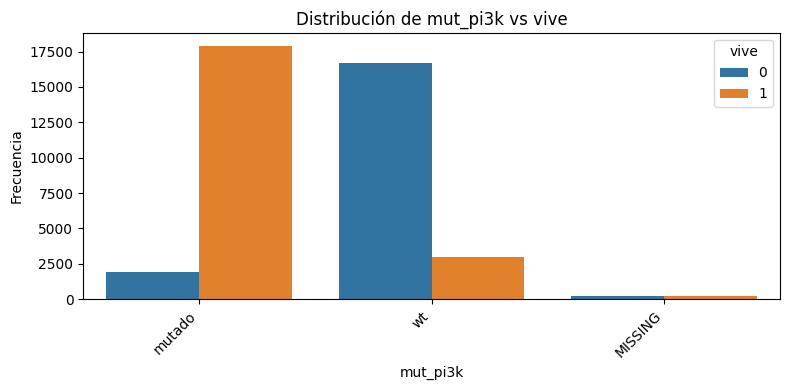

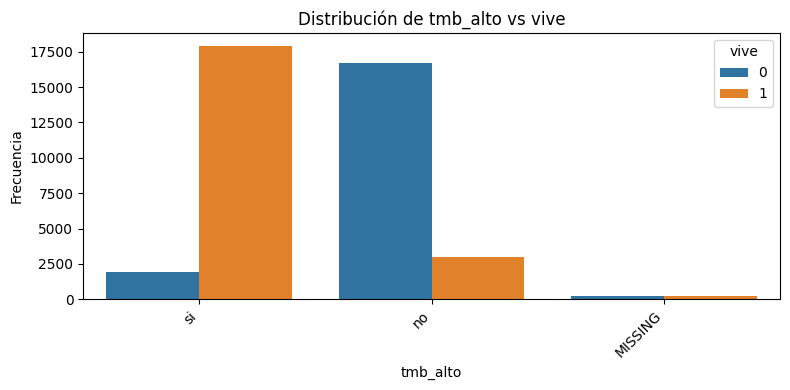

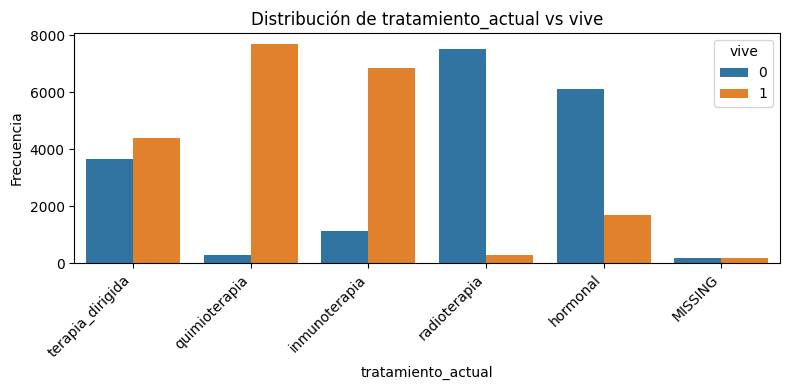

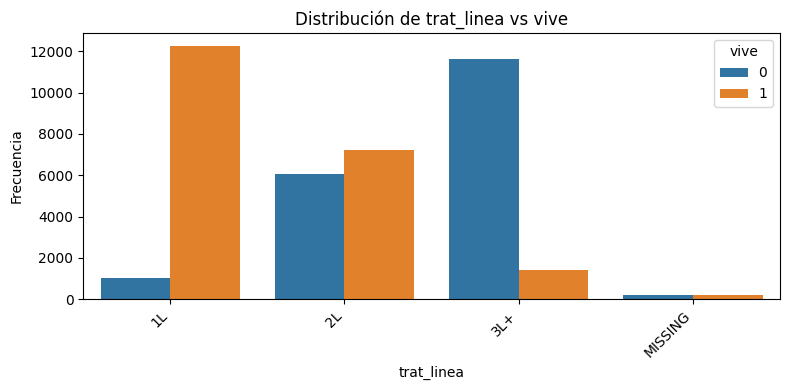

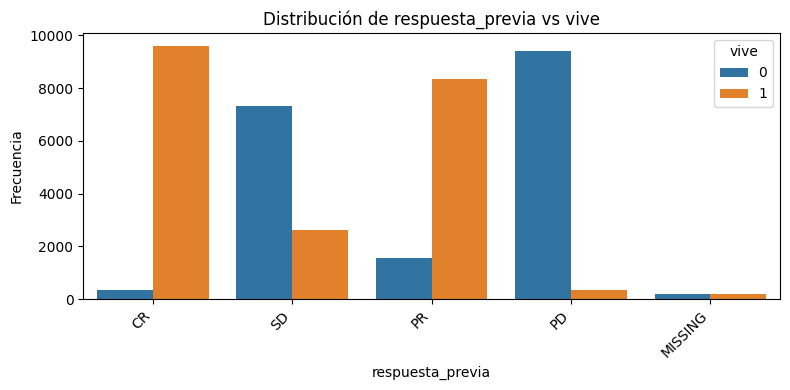

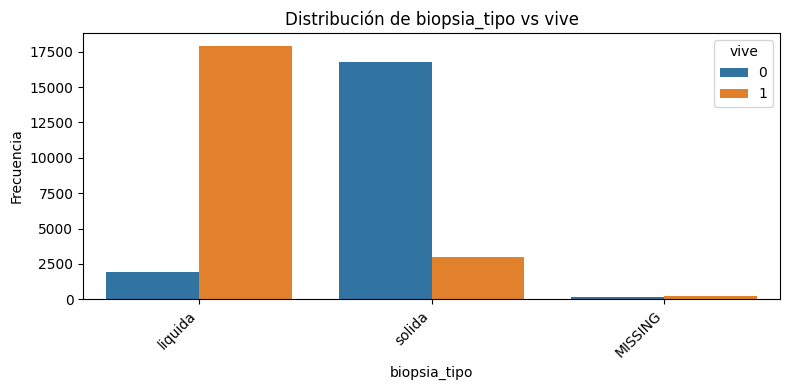

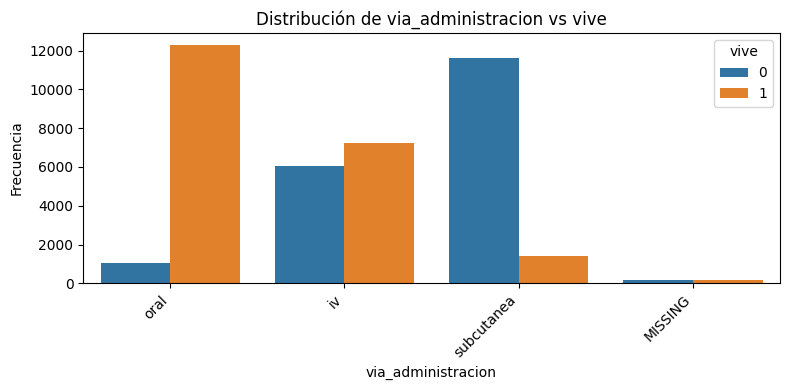

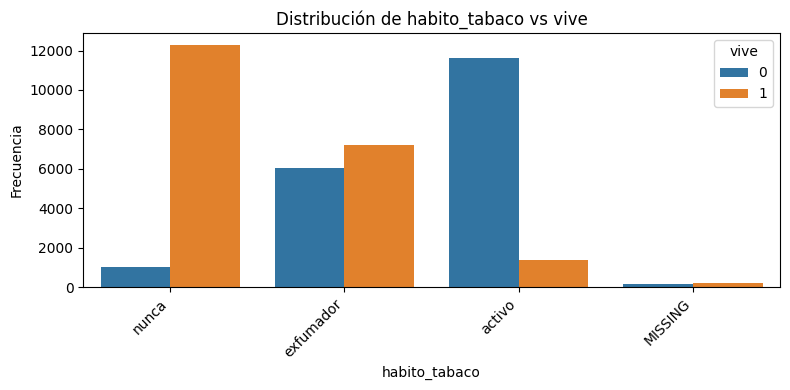

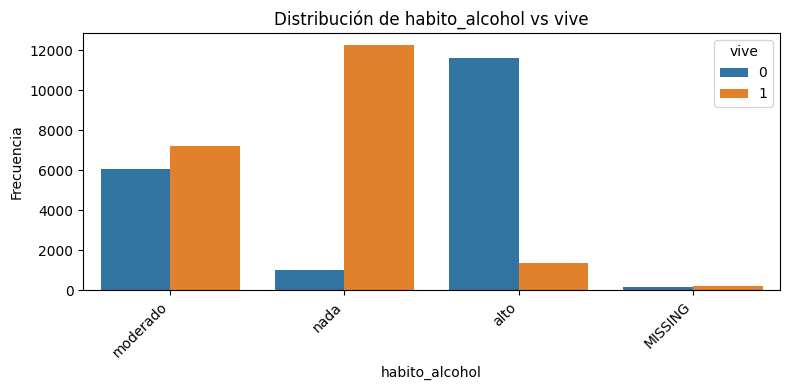

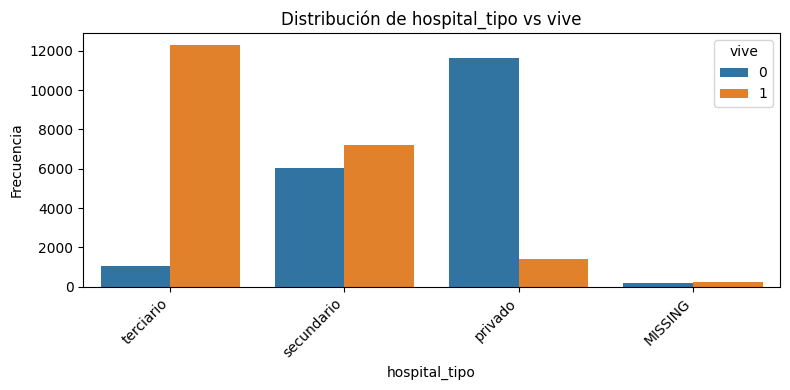

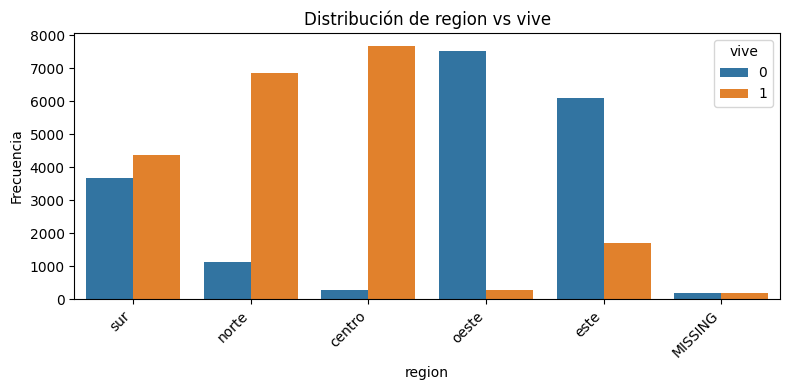

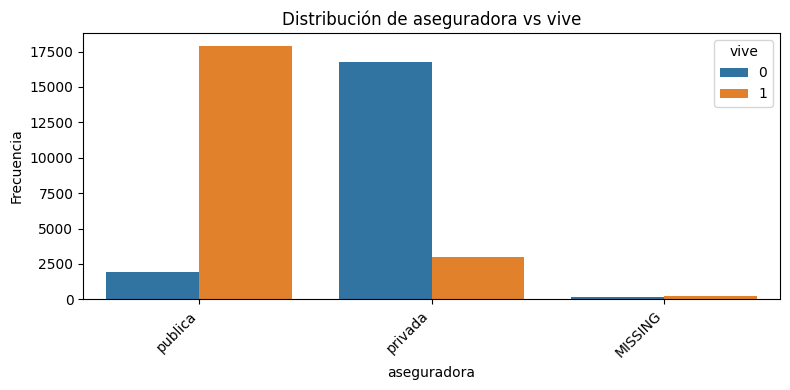

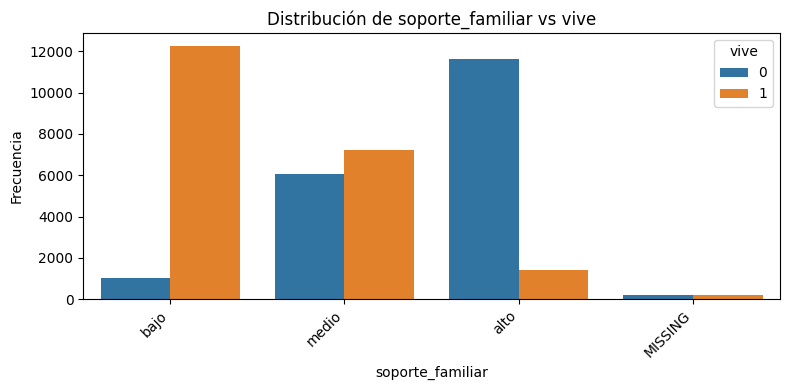

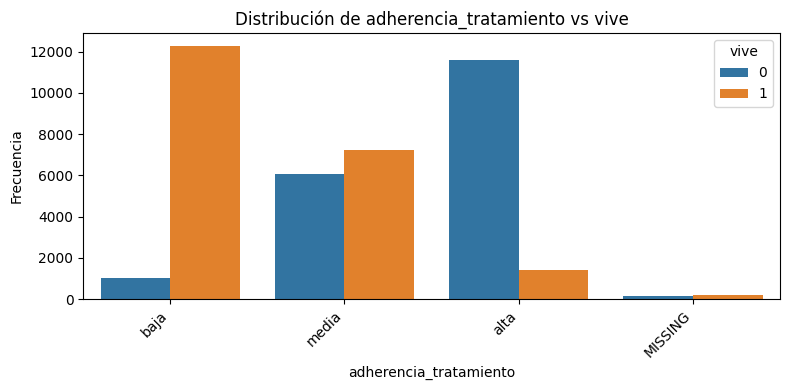

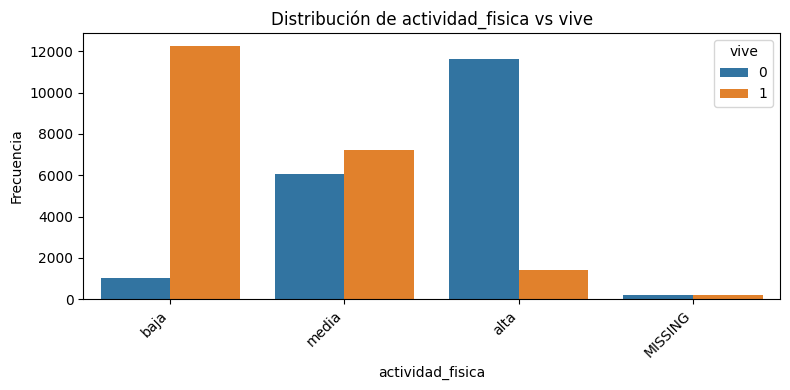

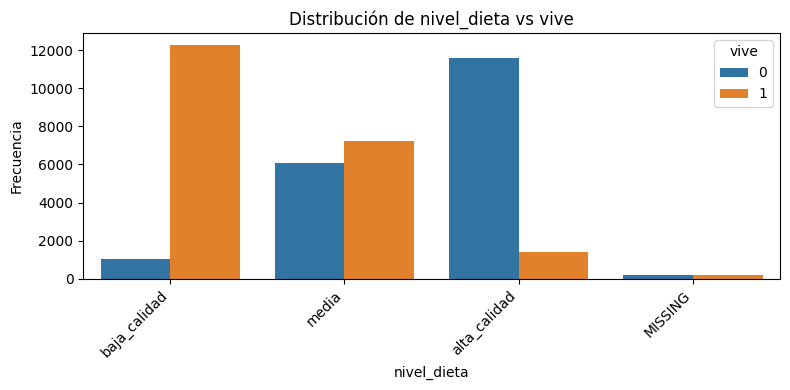

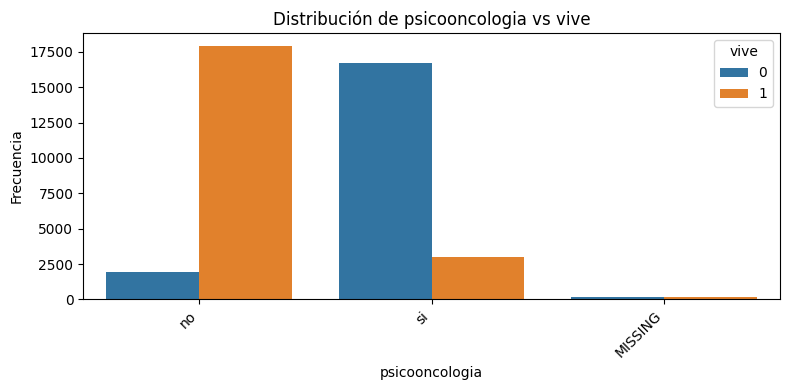

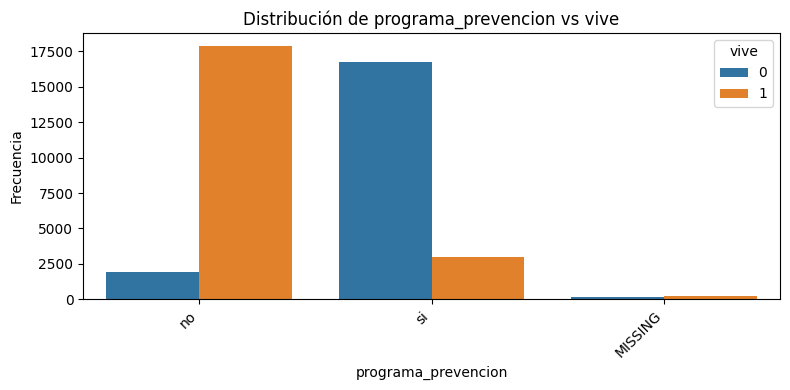

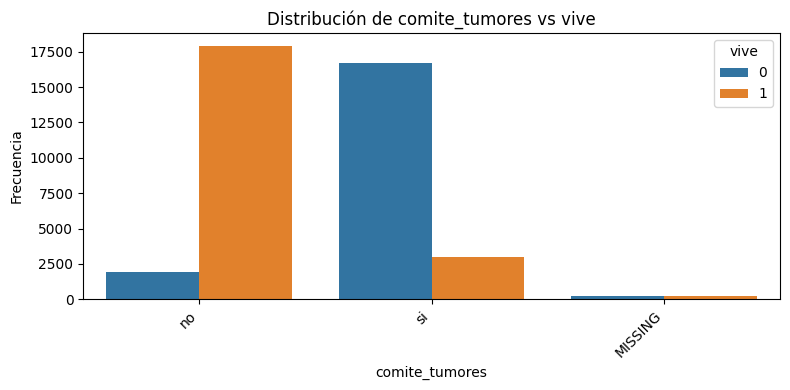

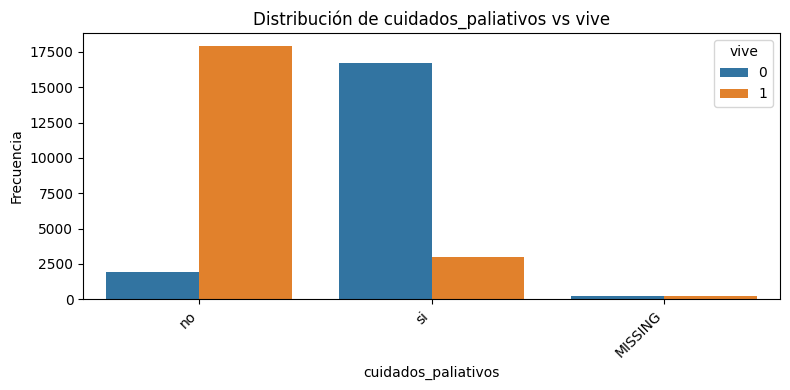

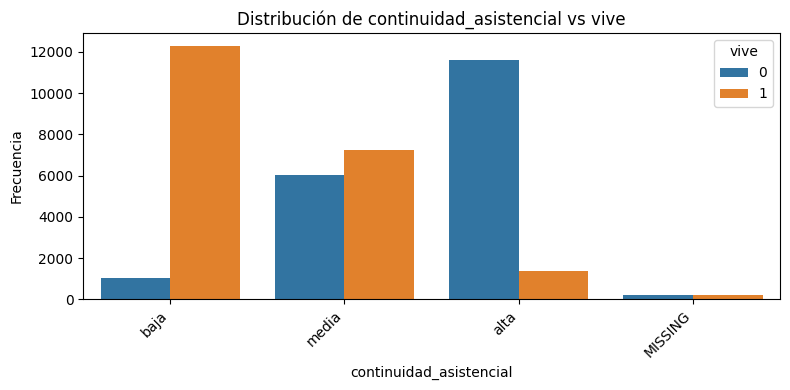

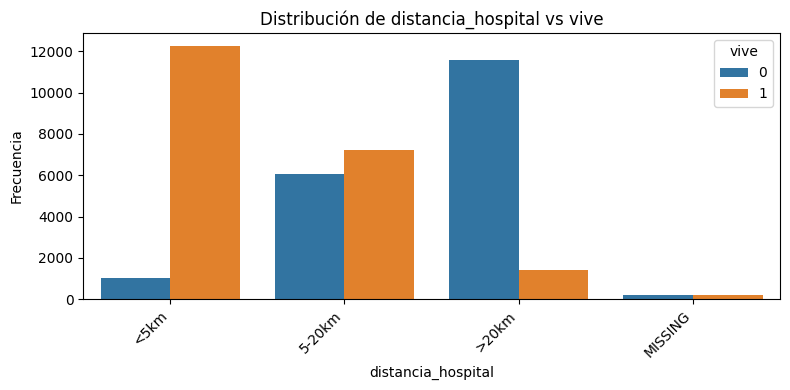

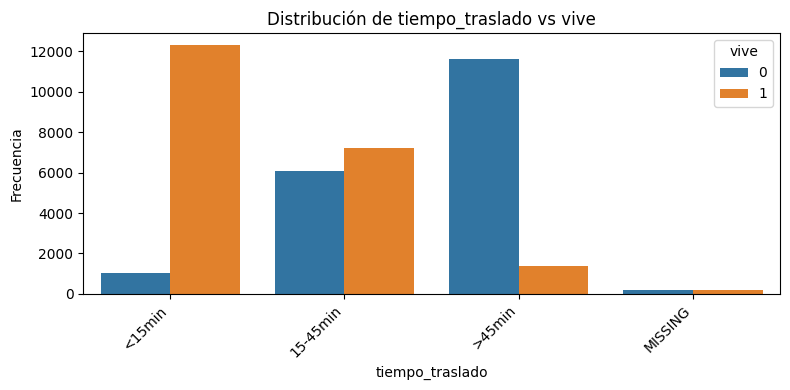

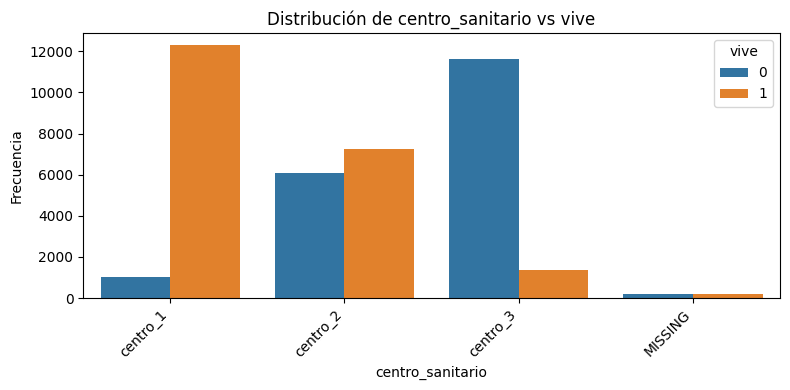

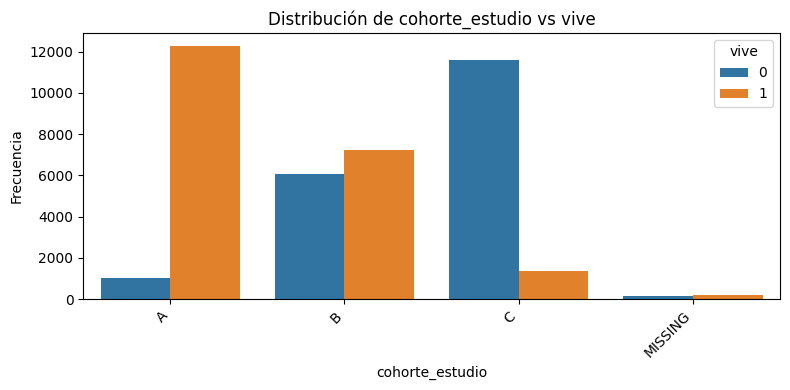

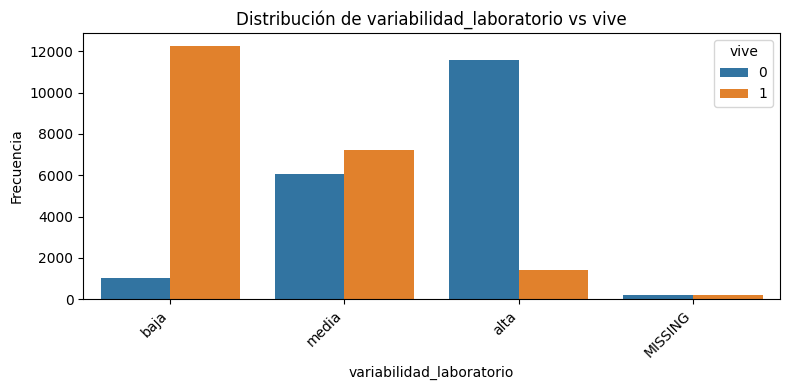

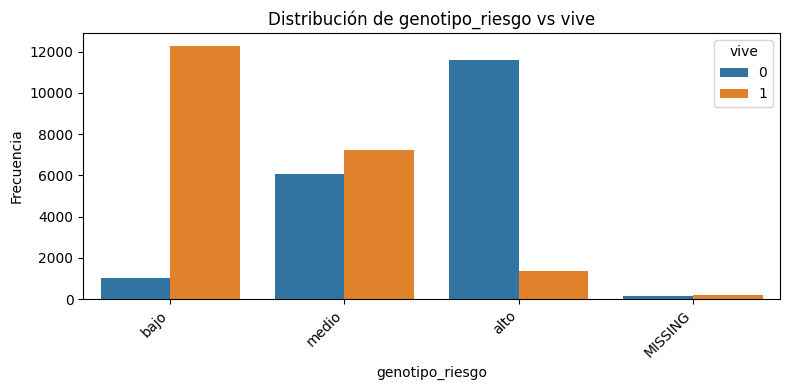

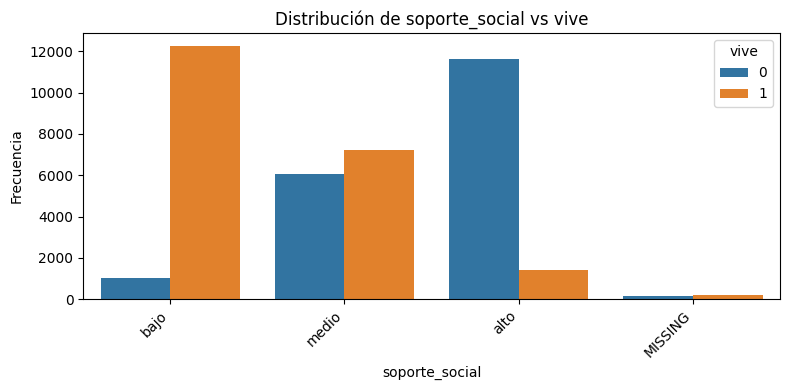

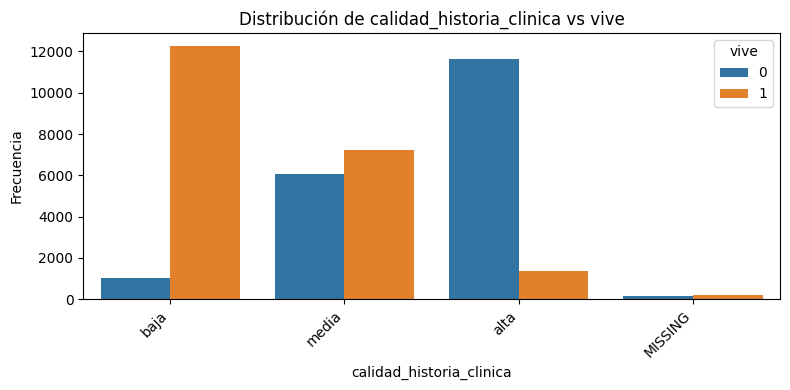

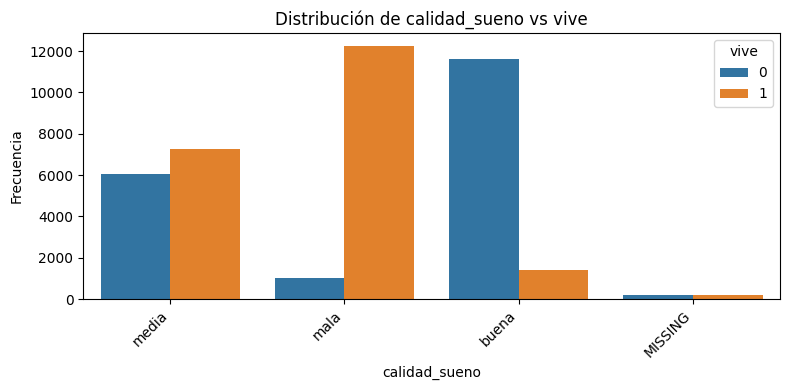

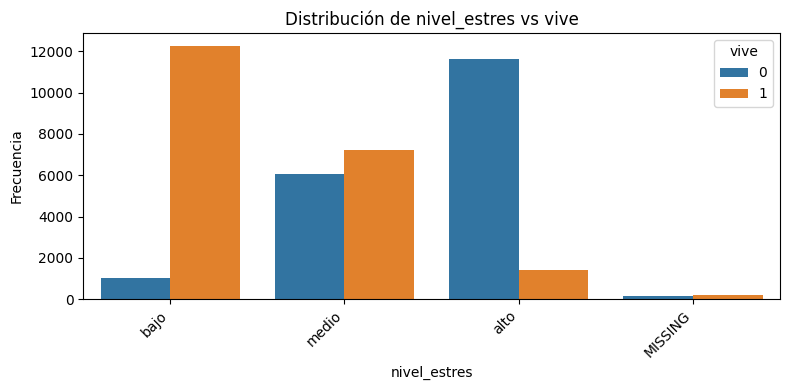

In [23]:
### Comparación variables categóricas vs objetivo 'vive'

#A continuación se generan histogramas (countplots) por cada variable categórica de `df` mostrando la distribución de sus categorías segmentada por la variable objetivo `vive`.  
#Si alguna columna tiene demasiadas categorías, se limita a las más frecuentes y agrupa el resto en "OTRAS".

import seaborn as sns
import matplotlib.pyplot as plt
# Identificar columnas categóricas originales (sin los label encoders aplicados sobre X_cat)
cat_cols_df = df.select_dtypes(include=["object", "category"]).columns.tolist()

target_col = "vive"

for col in cat_cols_df:
    serie = df[col].fillna("MISSING")
    vc = serie.value_counts()
    
    # Limitar cardinalidad alta
    max_cats = 15
    if len(vc) > max_cats:
        top_cats = vc.index[:max_cats]
        serie_limited = serie.where(serie.isin(top_cats), other="OTRAS")
    else:
        serie_limited = serie

    # Construir dataframe auxiliar para graficar
    plot_df = pd.DataFrame({
        col: serie_limited,
        target_col: df[target_col]
    })

    plt.figure(figsize=(8,4))
    order = plot_df[col].value_counts().index
    sns.countplot(data=plot_df, x=col, hue=target_col, order=order)
    plt.title(f"Distribución de {col} vs {target_col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()


# 1


⭐ IMPORTANCIA DE FEATURES (ordenado):
                     feature  importance
90                      sexo    0.048017
108             biopsia_tipo    0.045151
94               n_linfatico    0.041128
92              estadio_ajcc    0.040564
101                 mut_braf    0.040411
..                       ...         ...
48   sesiones_quimio_missing    0.000305
62               rdw_missing    0.000299
60               hcm_missing    0.000293
75               ggt_missing    0.000282
46               imc_missing    0.000256

[134 rows x 2 columns]


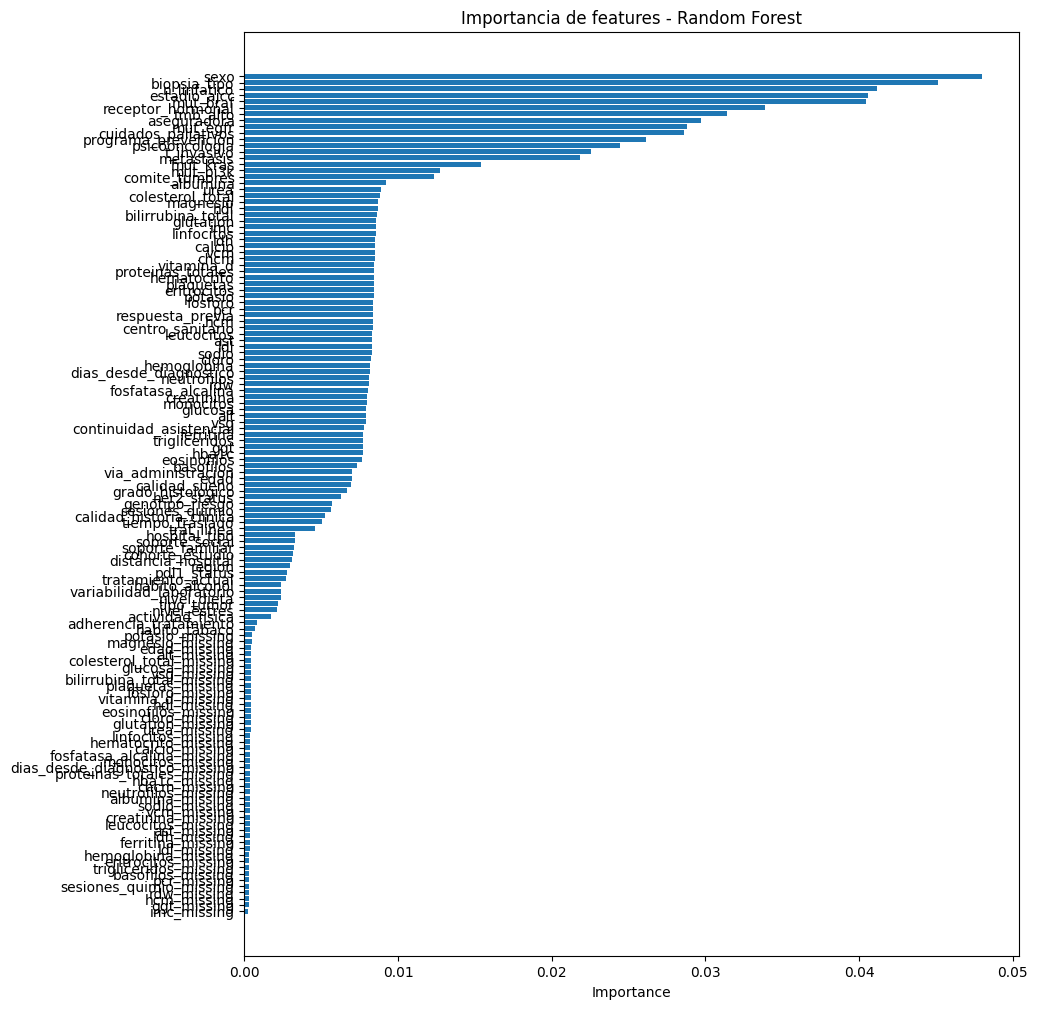

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# =============================================================
# 1. Unimos todas las features numéricas + categóricas
# =============================================================

X_train_full = np.hstack([
    X_train_num_scaled.values.astype("float32"),
    X_train_cat.values.astype("float32")
])

X_test_full = np.hstack([
    X_test_num_scaled.values.astype("float32"),
    X_test_cat.values.astype("float32")
])

# Nombres de columnas (para importancia de features)
full_feature_names = (
    list(X_train_num_scaled.columns) +
    list(X_train_cat.columns)
)

# =============================================================
# 2. Random Forest
# =============================================================

rf = RandomForestClassifier(
    n_estimators=400,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train_full, y_train)

# =============================================================
# 3. Feature importances
# =============================================================

importances = rf.feature_importances_
results = pd.DataFrame({
    "feature": full_feature_names,
    "importance": importances
}).sort_values("importance", ascending=False)

print("\n⭐ IMPORTANCIA DE FEATURES (ordenado):")
print(results)

# =============================================================
# 4. Plot de importancia
# =============================================================

plt.figure(figsize=(10, 12))
plt.barh(results["feature"], results["importance"])
plt.gca().invert_yaxis()
plt.title("Importancia de features - Random Forest")
plt.xlabel("Importance")
plt.show()


In [70]:
results.head(17)

feature  importance
90                  sexo    0.048017
108         biopsia_tipo    0.045151
94           n_linfatico    0.041128
92          estadio_ajcc    0.040564
101             mut_braf    0.040411
97     receptor_hormonal    0.033862
104             tmb_alto    0.031415
114          aseguradora    0.029696
102             mut_egfr    0.028767
122  cuidados_paliativos    0.028632
120  programa_prevencion    0.026150
119       psicooncologia    0.024433
93            t_invasivo    0.022554
95            metastasis    0.021839
100             mut_kras    0.015421
103             mut_pi3k    0.012754
121       comite_tumores    0.012327

In [74]:
importances_reduced = rf_reduced.feature_importances_

results_reduced = (
    pd.DataFrame({
        "feature": reduced_feature_names,
        "importance": importances_reduced
    })
    .sort_values("importance", ascending=False)
)

print(results_reduced.head(30))  # Mostrar las 30 más importantes


                      feature  importance
96           respuesta_previa    0.093898
109          centro_sanitario    0.038363
106   continuidad_asistencial    0.028512
90                 tipo_tumor    0.028130
92                her2_status    0.025084
91          grado_histologico    0.024651
112           genotipo_riesgo    0.024272
97         via_administracion    0.024110
95                 trat_linea    0.024048
114  calidad_historia_clinica    0.023088
105               nivel_dieta    0.021158
110           cohorte_estudio    0.020780
100             hospital_tipo    0.020577
103    adherencia_tratamiento    0.020515
115             calidad_sueno    0.018991
108           tiempo_traslado    0.018454
104          actividad_fisica    0.016206
101                    region    0.016069
113            soporte_social    0.014341
94         tratamiento_actual    0.013832
111  variabilidad_laboratorio    0.012514
93                pdl1_status    0.011598
107        distancia_hospital    0

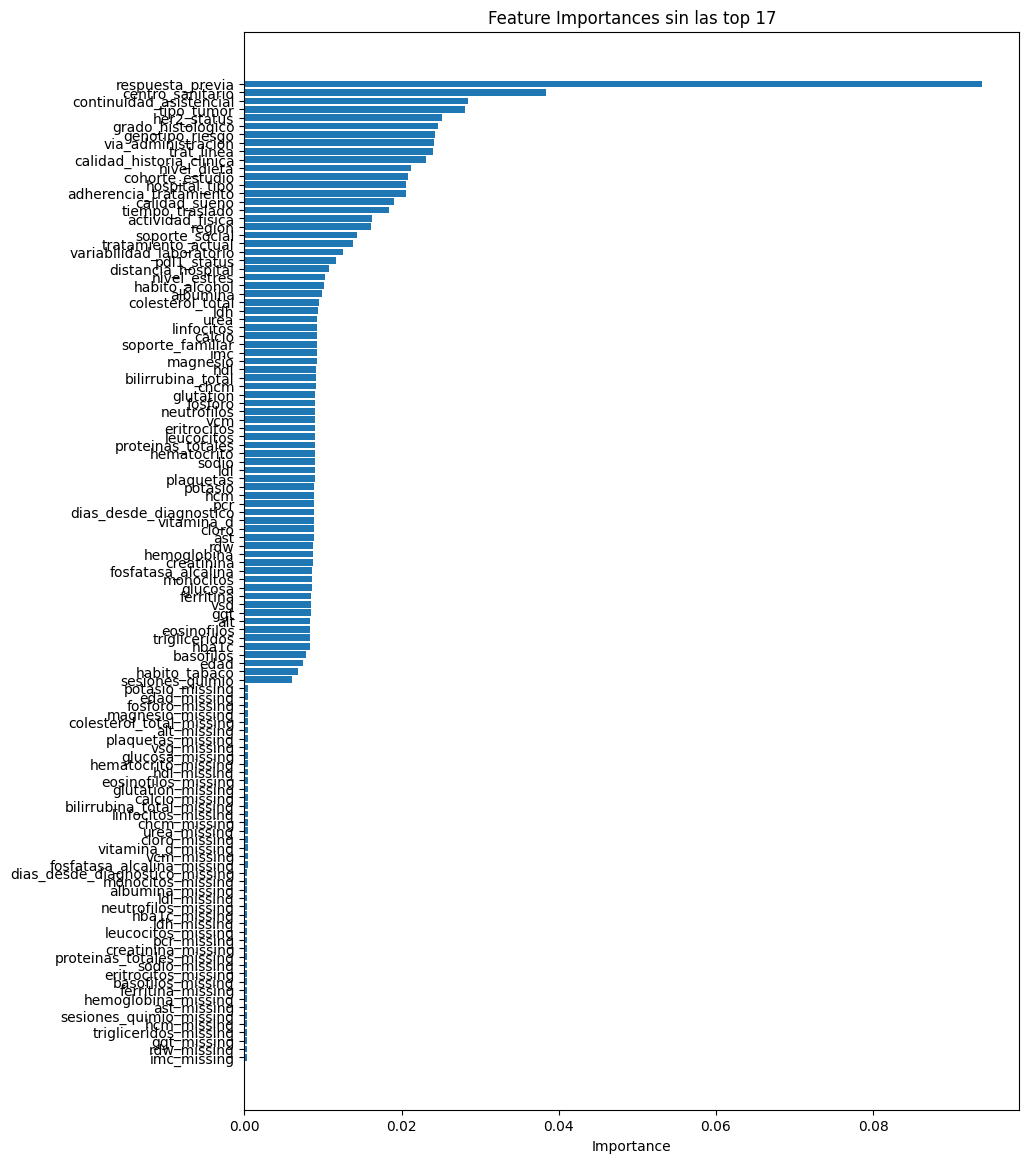

In [75]:
plt.figure(figsize=(10, 14))
plt.barh(results_reduced["feature"], results_reduced["importance"])
plt.gca().invert_yaxis()
plt.title("Feature Importances sin las top 17")
plt.xlabel("Importance")
plt.show()


Nº de features usadas ahora: 115
Accuracy sin top 17 + respuesta_previa + centro_sanitario: 0.8465
                      feature  importance
90                 tipo_tumor    0.046390
96         via_administracion    0.038493
99              hospital_tipo    0.028236
105   continuidad_asistencial    0.027670
91          grado_histologico    0.026512
112  calidad_historia_clinica    0.026075
104               nivel_dieta    0.024580
113             calidad_sueno    0.023450
94         tratamiento_actual    0.022323
102    adherencia_tratamiento    0.022232
100                    region    0.022098
95                 trat_linea    0.021108
107           tiempo_traslado    0.020586
108           cohorte_estudio    0.019497
111            soporte_social    0.019407
92                her2_status    0.019273
106        distancia_hospital    0.019093
110           genotipo_riesgo    0.018377
109  variabilidad_laboratorio    0.017446
101          soporte_familiar    0.015621
97              hab

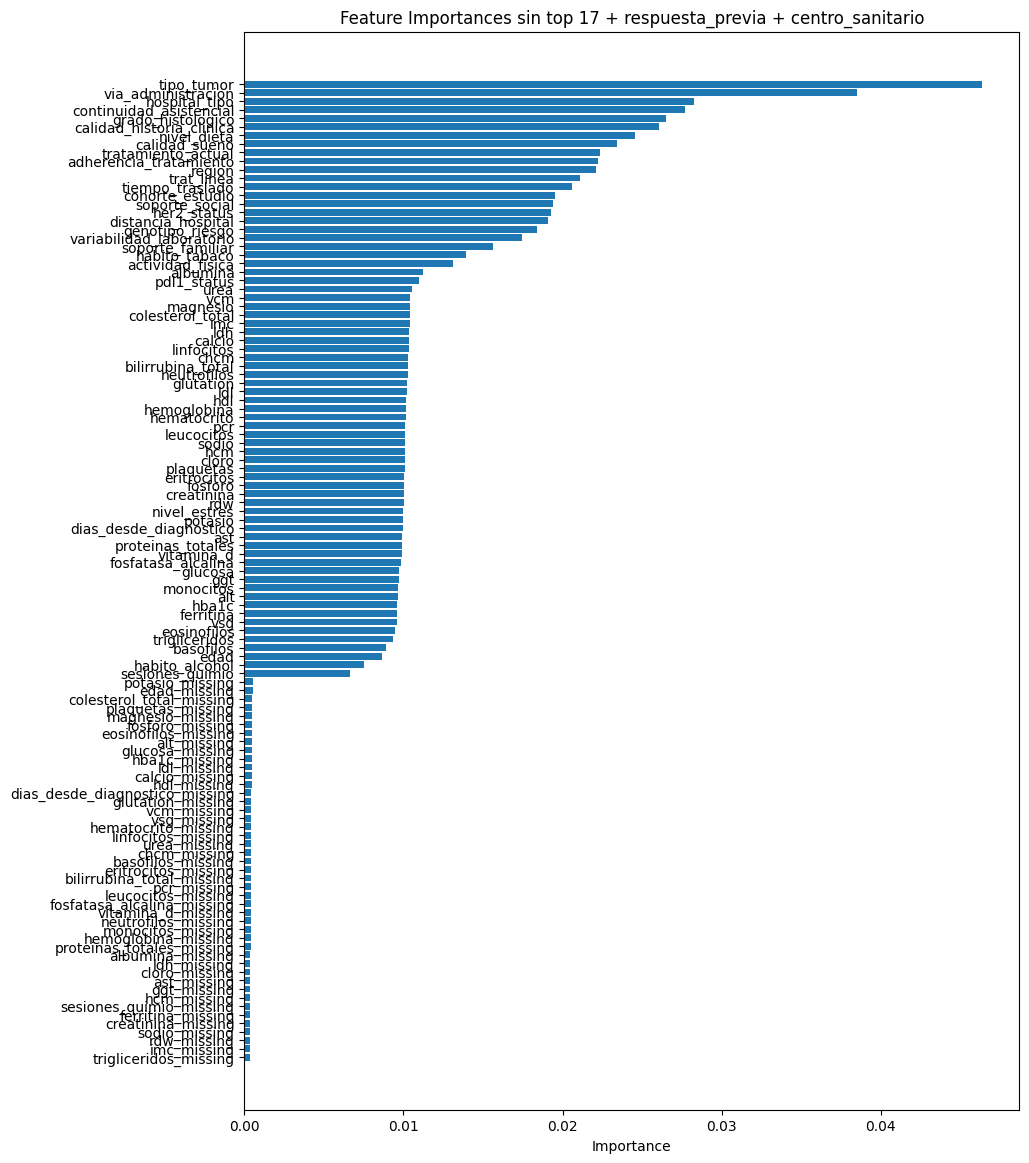

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# ==============================
# 1. Lista completa de variables a eliminar
#    (las 17 primeras + respuesta_previa + centro_sanitario)
# ==============================

features_drop = [
    "sexo",
    "biopsia_tipo",
    "n_linfatico",
    "estadio_ajcc",
    "mut_braf",
    "receptor_hormonal",
    "tmb_alto",
    "aseguradora",
    "mut_egfr",
    "cuidados_paliativos",
    "programa_prevencion",
    "psicooncologia",
    "t_invasivo",
    "metastasis",
    "mut_kras",
    "mut_pi3k",
    "comite_tumores",
    # nuevas a quitar:
    "respuesta_previa",
    "centro_sanitario",
]

# ==============================
# 2. Construir X_train / X_test SIN esas variables
# ==============================

cols_keep_2 = [i for i, c in enumerate(full_feature_names) if c not in features_drop]

X_train_reduced2 = X_train_full[:, cols_keep_2]
X_test_reduced2  = X_test_full[:, cols_keep_2]

feature_names_reduced2 = [full_feature_names[i] for i in cols_keep_2]

print("Nº de features usadas ahora:", len(feature_names_reduced2))

# ==============================
# 3. Entrenar Random Forest reducido
# ==============================

rf_reduced2 = RandomForestClassifier(
    n_estimators=400,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)
rf_reduced2.fit(X_train_reduced2, y_train)

y_pred_red2 = rf_reduced2.predict(X_test_reduced2)
acc_red2 = accuracy_score(y_test, y_pred_red2)

print("Accuracy sin top 17 + respuesta_previa + centro_sanitario:", acc_red2)

# ==============================
# 4. Nuevas feature importances
# ==============================

importances_red2 = rf_reduced2.feature_importances_

results_red2 = (
    pd.DataFrame({
        "feature": feature_names_reduced2,
        "importance": importances_red2
    })
    .sort_values("importance", ascending=False)
)

print(results_red2.head(30))  # top 30

# (Opcional) gráfico
plt.figure(figsize=(10, 14))
plt.barh(results_red2["feature"], results_red2["importance"])
plt.gca().invert_yaxis()
plt.title("Feature Importances sin top 17 + respuesta_previa + centro_sanitario")
plt.xlabel("Importance")
plt.show()


Nº de features usadas ahora: 112
Accuracy sin top 17 + respuesta_previa + centro_sanitario + tipo_tumor + via_administracion: 0.8245
                      feature  importance
107           genotipo_riesgo    0.032144
93         tratamiento_actual    0.030562
98                     region    0.029852
91                her2_status    0.029512
105           cohorte_estudio    0.028202
109  calidad_historia_clinica    0.028189
110             calidad_sueno    0.027610
102               nivel_dieta    0.026766
97              hospital_tipo    0.026639
106  variabilidad_laboratorio    0.025901
100    adherencia_tratamiento    0.024688
90          grado_histologico    0.024638
104           tiempo_traslado    0.021311
108            soporte_social    0.020480
101          actividad_fisica    0.019843
94                 trat_linea    0.018508
103        distancia_hospital    0.017949
111              nivel_estres    0.016037
95              habito_tabaco    0.015758
96             habito_alcoh

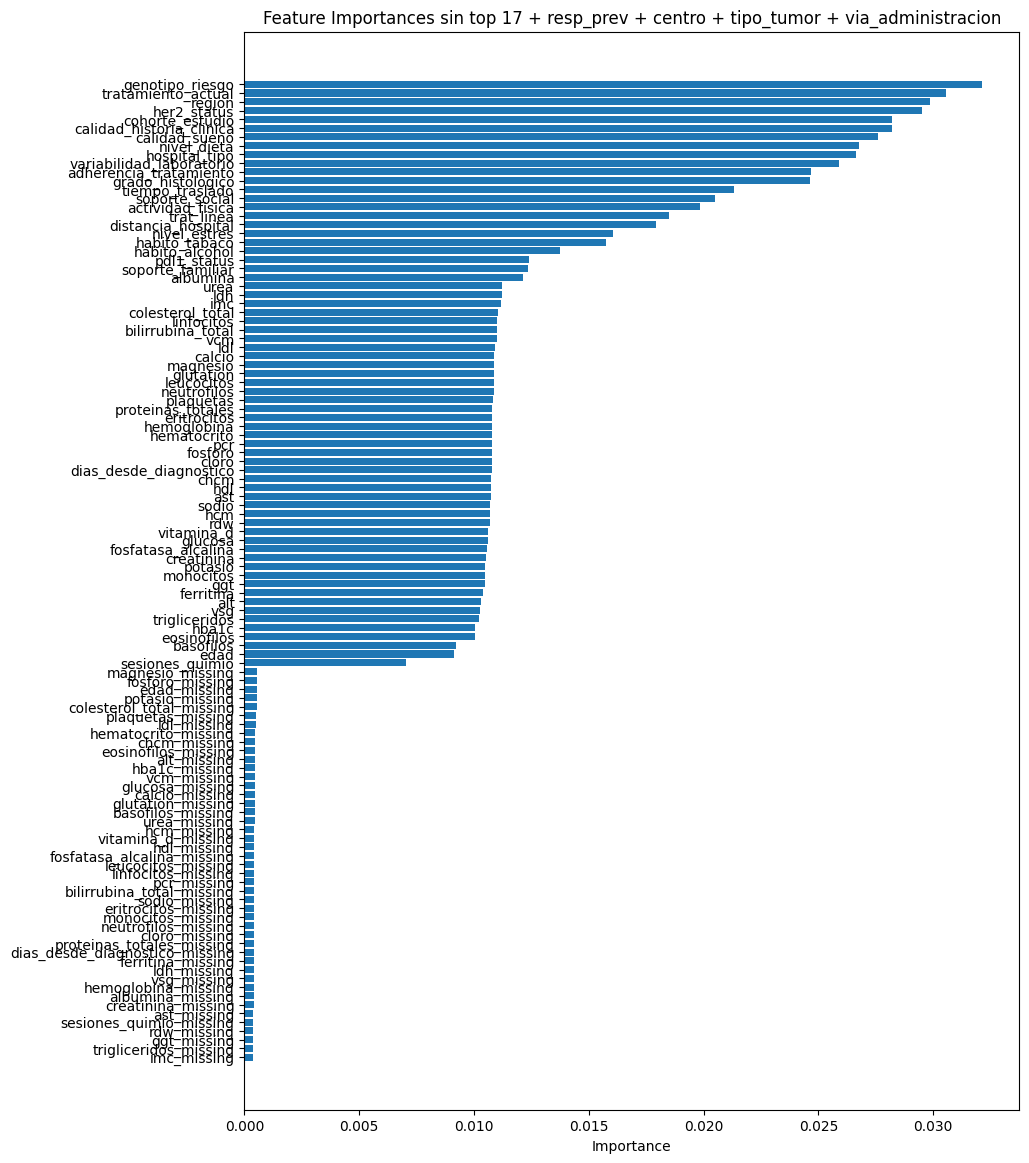

In [103]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# ============================================================
# 1. Partimos de la lista anterior de variables a eliminar
#    (top 17 + respuesta_previa + centro_sanitario)
# ============================================================

features_drop = [
    "sexo",
    "biopsia_tipo",
    "n_linfatico",
    "estadio_ajcc",
    "mut_braf",
    "receptor_hormonal",
    "tmb_alto",
    "aseguradora",
    "mut_egfr",
    "cuidados_paliativos",
    "programa_prevencion",
    "psicooncologia",
    "t_invasivo",
    "metastasis",
    "mut_kras",
    "mut_pi3k",
    "comite_tumores",
    "respuesta_previa",
    "centro_sanitario",
]

# ============================================================
# 2. Añadimos las dos nuevas a eliminar: tipo_tumor y via_administracion
# ============================================================

features_drop = features_drop + ["tipo_tumor", "via_administracion",'continuidad_asistencial']

# ============================================================
# 3. Reconstruimos X_train / X_test SIN esas variables
# ============================================================

cols_keep_3 = [i for i, c in enumerate(full_feature_names) if c not in features_drop]

X_train_reduced3 = X_train_full[:, cols_keep_3]
X_test_reduced3  = X_test_full[:, cols_keep_3]

feature_names_reduced3 = [full_feature_names[i] for i in cols_keep_3]

print("Nº de features usadas ahora:", len(feature_names_reduced3))

# ============================================================
# 4. Entrenamos el nuevo Random Forest reducido
# ============================================================

rf_reduced3 = RandomForestClassifier(
    n_estimators=400,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)
rf_reduced3.fit(X_train_reduced3, y_train)

y_pred_red3 = rf_reduced3.predict(X_test_reduced3)
acc_red3 = accuracy_score(y_test, y_pred_red3)

print("Accuracy sin top 17 + respuesta_previa + centro_sanitario + tipo_tumor + via_administracion:",
      acc_red3)

# ============================================================
# 5. Nuevas feature importances
# ============================================================

importances_red3 = rf_reduced3.feature_importances_

results_red3 = (
    pd.DataFrame({
        "feature": feature_names_reduced3,
        "importance": importances_red3
    })
    .sort_values("importance", ascending=False)
)

print(results_red3.head(30))  # top 30

# (Opcional) gráfico
plt.figure(figsize=(10, 14))
plt.barh(results_red3["feature"], results_red3["importance"])
plt.gca().invert_yaxis()
plt.title("Feature Importances sin top 17 + resp_prev + centro + tipo_tumor + via_administracion")
plt.xlabel("Importance")
plt.show()


Nº de features usadas SOLO top variables: 21
Features: ['sexo', 'tipo_tumor', 'estadio_ajcc', 't_invasivo', 'n_linfatico', 'metastasis', 'receptor_hormonal', 'mut_kras', 'mut_braf', 'mut_egfr', 'mut_pi3k', 'tmb_alto', 'respuesta_previa', 'biopsia_tipo', 'via_administracion', 'aseguradora', 'psicooncologia', 'programa_prevencion', 'comite_tumores', 'cuidados_paliativos', 'centro_sanitario']

🔥 Accuracy usando SOLO las variables más importantes: 0.879

===== Feature Importances SOLO TOP VARIABLES =====
                feature  importance
13         biopsia_tipo    0.144191
2          estadio_ajcc    0.124704
8              mut_braf    0.112421
6     receptor_hormonal    0.085030
4           n_linfatico    0.071847
17  programa_prevencion    0.069205
19  cuidados_paliativos    0.058425
0                  sexo    0.058063
11             tmb_alto    0.055914
15          aseguradora    0.040110
5            metastasis    0.038052
9              mut_egfr    0.035597
10             mut_pi3k   

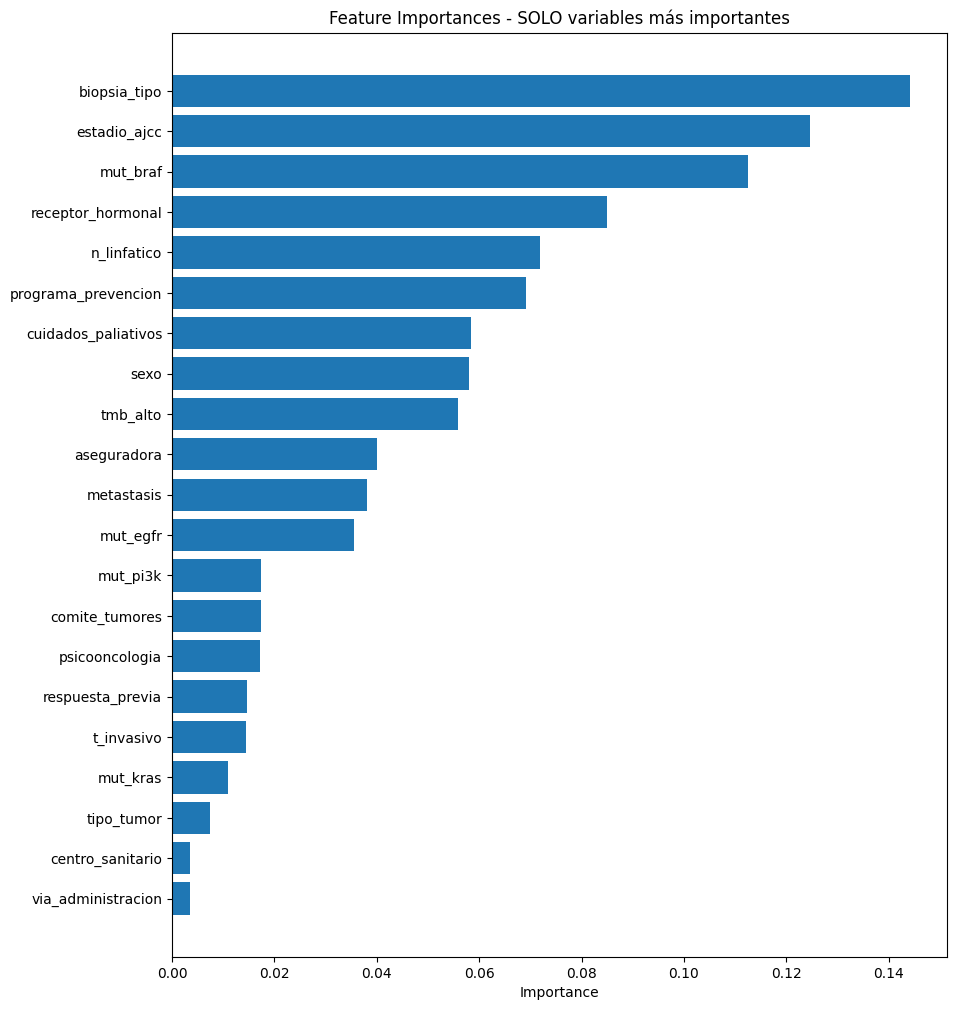

In [139]:
features_keep = [
    "sexo",
    "biopsia_tipo",
    "n_linfatico",
    "estadio_ajcc",
    "mut_braf",
    "receptor_hormonal",
    "tmb_alto",
    "aseguradora",
    "mut_egfr",
    "cuidados_paliativos",
    "programa_prevencion",
    "psicooncologia",
    "t_invasivo",
    "metastasis",
    "mut_kras",
    "mut_pi3k",
    "comite_tumores",
    "respuesta_previa",
    "centro_sanitario",
    "tipo_tumor",
    "via_administracion"
]
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# ============================================================
# 1. Extraemos SOLO estas columnas del dataset original
# ============================================================

# Obtenemos índices de esas columnas en el array final de features
cols_keep_only = [i for i, c in enumerate(full_feature_names) if c in features_keep]

X_train_top = X_train_full[:, cols_keep_only]
X_test_top  = X_test_full[:, cols_keep_only]

feature_names_top = [full_feature_names[i] for i in cols_keep_only]

print("Nº de features usadas SOLO top variables:", len(feature_names_top))
print("Features:", feature_names_top)

# ============================================================
# 2. Entrenar modelo SOLO con las variables más importantes
# ============================================================

rf_top = RandomForestClassifier(
    n_estimators=400,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

rf_top.fit(X_train_top, y_train)

y_pred_top = rf_top.predict(X_test_top)
acc_top = accuracy_score(y_test, y_pred_top)

print("\n🔥 Accuracy usando SOLO las variables más importantes:", acc_top)

# ============================================================
# 3. Feature Importances SOLO de este subconjunto
# ============================================================

importances_top = rf_top.feature_importances_

results_top = (
    pd.DataFrame({
        "feature": feature_names_top,
        "importance": importances_top
    })
    .sort_values("importance", ascending=False)
)

print("\n===== Feature Importances SOLO TOP VARIABLES =====")
print(results_top)

# (Opcional) Gráfico
plt.figure(figsize=(10, 12))
plt.barh(results_top["feature"], results_top["importance"])
plt.gca().invert_yaxis()
plt.title("Feature Importances - SOLO variables más importantes")
plt.xlabel("Importance")
plt.show()


# proceso iterativo de redes neuronales univariable

In [31]:
# ============================================================
# NN UNIVARIADA: UNA FEATURE CADA VEZ + ACCURACY EN TEST
# A partir de X_num, X_cat, y (variables ORIGINALES)
# ============================================================

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import accuracy_score

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Usando dispositivo:", device)

# ------------------------------------------------------------
# 1. Separar TRAIN / VALID / TEST a partir de X_num, X_cat, y
#    (SIN transformar aún)
# ------------------------------------------------------------

num_cols = X_num.columns.tolist()
cat_cols = X_cat.columns.tolist()

X_full = pd.concat([X_num, X_cat], axis=1)

X_train, X_temp, y_train, y_temp = train_test_split(
    X_full, y, test_size=0.2, random_state=42, stratify=y
)

X_valid, X_test, y_valid, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print("Shapes ->",
      "Train:", X_train.shape,
      "Valid:", X_valid.shape,
      "Test:",  X_test.shape)

# Convertimos y a numpy una sola vez
y_train_arr = np.array(y_train).astype("float32")
y_valid_arr = np.array(y_valid).astype("float32")
y_test_arr  = np.array(y_test).astype("float32")

# ------------------------------------------------------------
# 2. Definimos una red sencilla para 1 feature (o 2 si hay flag)
# ------------------------------------------------------------

class SimpleMLP(nn.Module):
    def __init__(self, n_features: int):
        super().__init__()
        self.fc1 = nn.Linear(n_features, 16)
        self.fc2 = nn.Linear(16, 32)
        self.out = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.atan(self.fc1(x))   # igual que tu primera capa
        x = torch.relu(self.fc2(x))
        x = torch.sigmoid(self.out(x))
        return x

# ------------------------------------------------------------
# 3. Bucle: entrenar UNA red por cada feature
# ------------------------------------------------------------

results_single_nn = []

all_features = num_cols + cat_cols
print("Número de variables a evaluar de una en una:", len(all_features))

for feat in all_features:
    print(f"\n=== Entrenando NN solo con feature: {feat} ===")

    # ------------------------------
    # 3.1 Construir X_train/valid/test SOLO con esa feature
    # ------------------------------
    if feat in num_cols:
        # Numérica: imputamos mediana y añadimos flag _missing
        train_col = X_train[feat].copy()
        valid_col = X_valid[feat].copy()
        test_col  = X_test[feat].copy()

        median = train_col.median()

        train_missing = train_col.isna().astype("float32").values.reshape(-1, 1)
        valid_missing = valid_col.isna().astype("float32").values.reshape(-1, 1)
        test_missing  = test_col.isna().astype("float32").values.reshape(-1, 1)

        train_filled = train_col.fillna(median).astype("float32").values.reshape(-1, 1)
        valid_filled = valid_col.fillna(median).astype("float32").values.reshape(-1, 1)
        test_filled  = test_col.fillna(median).astype("float32").values.reshape(-1, 1)

        scaler = MinMaxScaler(feature_range=(0.0, 1.0))
        scaler.fit(train_filled)

        train_scaled = scaler.transform(train_filled)
        valid_scaled = scaler.transform(valid_filled)
        test_scaled  = scaler.transform(test_filled)

        # valor escalado + flag missing -> 2 inputs
        X_train_feat = np.hstack([train_scaled, train_missing]).astype("float32")
        X_valid_feat = np.hstack([valid_scaled, valid_missing]).astype("float32")
        X_test_feat  = np.hstack([test_scaled,  test_missing]).astype("float32")

    elif feat in cat_cols:
        # Categórica: imputamos "MISSING" + LabelEncoder
        train_col = X_train[feat].astype(str).copy()
        valid_col = X_valid[feat].astype(str).copy()
        test_col  = X_test[feat].astype(str).copy()

        train_col = train_col.fillna("MISSING")
        valid_col = valid_col.fillna("MISSING")
        test_col  = test_col.fillna("MISSING")

        enc = LabelEncoder()
        train_enc = enc.fit_transform(train_col)

        known = set(enc.classes_)

        valid_col = valid_col.where(valid_col.isin(known), other="MISSING")
        test_col  = test_col.where(test_col.isin(known),  other="MISSING")

        valid_enc = enc.transform(valid_col)
        test_enc  = enc.transform(test_col)

        X_train_feat = train_enc.reshape(-1, 1).astype("float32")
        X_valid_feat = valid_enc.reshape(-1, 1).astype("float32")
        X_test_feat  = test_enc.reshape(-1, 1).astype("float32")
    else:
        continue  # por si acaso

    n_inputs = X_train_feat.shape[1]

    # ------------------------------
    # 3.2 Tensors y DataLoaders
    # ------------------------------
    X_train_t = torch.from_numpy(X_train_feat).float().to(device)
    y_train_t = torch.from_numpy(y_train_arr).unsqueeze(1).to(device)

    X_valid_t = torch.from_numpy(X_valid_feat).float().to(device)
    y_valid_t = torch.from_numpy(y_valid_arr).unsqueeze(1).to(device)

    X_test_t = torch.from_numpy(X_test_feat).float().to(device)
    y_test_t = torch.from_numpy(y_test_arr).unsqueeze(1).to(device)

    train_ds = TensorDataset(X_train_t, y_train_t)
    valid_ds = TensorDataset(X_valid_t, y_valid_t)
    test_ds  = TensorDataset(X_test_t,  y_test_t)

    train_loader = DataLoader(train_ds, batch_size=256, shuffle=True)
    valid_loader = DataLoader(valid_ds, batch_size=256, shuffle=False)
    test_loader  = DataLoader(test_ds,  batch_size=256, shuffle=False)

    # ------------------------------
    # 3.3 Definir y entrenar la red
    # ------------------------------
    model_single = SimpleMLP(n_features=n_inputs).to(device)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model_single.parameters(), lr=1e-2, weight_decay=1e-4)

    num_epochs = 5
    for epoch in range(num_epochs):
        # train
        model_single.train()
        for xb, yb in train_loader:
            xb = xb.to(device)
            yb = yb.to(device)
            optimizer.zero_grad()
            out = model_single(xb)
            loss = criterion(out, yb)
            loss.backward()
            optimizer.step()

        # valid (no usamos early stopping aquí, solo entreno fijo)
        model_single.eval()
        val_loss = 0.0
        with torch.no_grad():
            for xb, yb in valid_loader:
                xb = xb.to(device)
                yb = yb.to(device)
                out = model_single(xb)
                loss = criterion(out, yb)
                val_loss += loss.item()
        val_loss /= max(1, len(valid_loader))
        # puedes imprimir si quieres:
        # print(f"Epoch {epoch+1}/{num_epochs} - val_loss: {val_loss:.4f}")

    # ------------------------------
    # 3.4 Evaluar en TEST
    # ------------------------------
    model_single.eval()
    all_labels = []
    all_preds = []

    with torch.no_grad():
        for xb, yb in test_loader:
            xb = xb.to(device)
            yb = yb.to(device)
            probs = model_single(xb).squeeze(1)
            preds = (probs >= 0.5).long()
            all_labels.extend(yb.cpu().numpy().astype(int).ravel())
            all_preds.extend(preds.cpu().numpy().astype(int))

    acc = accuracy_score(all_labels, all_preds)
    print(f"Feature: {feat:25s} | inputs: {n_inputs} | acc_test = {acc:.4f}")

    results_single_nn.append({
        "feature": feat,
        "n_inputs": n_inputs,
        "accuracy_test": acc
    })

# ------------------------------------------------------------
# 4. Tabla final con accuracies por variable
# ------------------------------------------------------------
results_single_nn_df = (
    pd.DataFrame(results_single_nn)
      .sort_values("accuracy_test", ascending=False)
      .reset_index(drop=True)
)

print("\n===== Accuracy por variable (NN univariada) =====")
print(results_single_nn_df)


Usando dispositivo: cuda
Shapes -> Train: (32000, 90) Valid: (4000, 90) Test: (4000, 90)
Número de variables a evaluar de una en una: 90

=== Entrenando NN solo con feature: edad ===
Feature: edad                      | inputs: 2 | acc_test = 0.5280

=== Entrenando NN solo con feature: imc ===
Feature: imc                       | inputs: 2 | acc_test = 0.5280

=== Entrenando NN solo con feature: dias_desde_diagnostico ===
Feature: dias_desde_diagnostico    | inputs: 2 | acc_test = 0.5280

=== Entrenando NN solo con feature: sesiones_quimio ===
Feature: sesiones_quimio           | inputs: 2 | acc_test = 0.5280

=== Entrenando NN solo con feature: hemoglobina ===
Feature: hemoglobina               | inputs: 2 | acc_test = 0.5280

=== Entrenando NN solo con feature: hematocrito ===
Feature: hematocrito               | inputs: 2 | acc_test = 0.5280

=== Entrenando NN solo con feature: eritrocitos ===
Feature: eritrocitos               | inputs: 2 | acc_test = 0.5280

=== Entrenando NN solo

In [ ]:
# de results_single_nn_df dame los que tengan accuracy_test entre 0.6 y 0.8
#results_single_nn_df[(results_single_nn_df['accuracy_test'] >= 0.6) & (results_single_nn_df['accuracy_test'] <= 0.80)]
# de results_single_nn_df dame los que tengan accuracy_test que son mayores que 0.8
results_single_nn_df[results_single_nn_df['accuracy_test'] > 0.8]

feature  n_inputs  accuracy_test
0          estadio_ajcc         1        0.87825
1     receptor_hormonal         1        0.87700
2   programa_prevencion         1        0.87700
3              mut_kras         1        0.87700
4      respuesta_previa         1        0.87675
..                  ...       ...            ...
85            ferritina         2        0.52800
86                  ldh         2        0.52800
87     colesterol_total         2        0.52800
88                  hdl         2        0.52800
89                  ldl         2        0.52800

[90 rows x 3 columns]

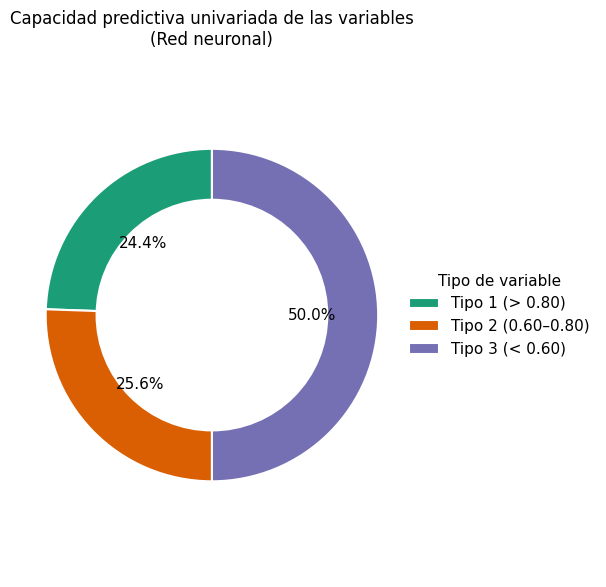

In [42]:
import matplotlib.pyplot as plt
from matplotlib import cm

# Si aún no existe la columna "tipo":
def clasificar_tipo(acc):
    if acc > 0.80:
        return "Tipo 1 (> 0.80)"
    elif acc > 0.60:
        return "Tipo 2 (0.60–0.80)"
    else:
        return "Tipo 3 (< 0.60)"

results_single_nn_df["tipo"] = results_single_nn_df["accuracy_test"].apply(clasificar_tipo)

counts = results_single_nn_df["tipo"].value_counts().reindex([
    "Tipo 1 (> 0.80)",
    "Tipo 2 (0.60–0.80)",
    "Tipo 3 (< 0.60)"
])

# Colores suaves
colors = ["#1b9e77", "#d95f02", "#7570b3"]

fig, ax = plt.subplots(figsize=(6,6))

wedges, texts, autotexts = ax.pie(
    counts.values,
    labels=None,                # usamos leyenda fuera
    autopct="%1.1f%%",
    startangle=90,
    colors=colors,
    wedgeprops=dict(edgecolor="white", linewidth=1.5)
)

# Donut: círculo blanco en el centro
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)

# Texto de porcentaje un poco más limpio
for autotext in autotexts:
    autotext.set_color("black")
    autotext.set_fontsize(11)

ax.set_title("Capacidad predictiva univariada de las variables\n(Red neuronal)", fontsize=12)

# Leyenda fuera del gráfico
ax.legend(
    wedges,
    counts.index,
    title="Tipo de variable",
    loc="center left",
    bbox_to_anchor=(1.0, 0.5),
    frameon=False
)

ax.axis("equal")  # círculo perfecto
plt.tight_layout()
plt.show()


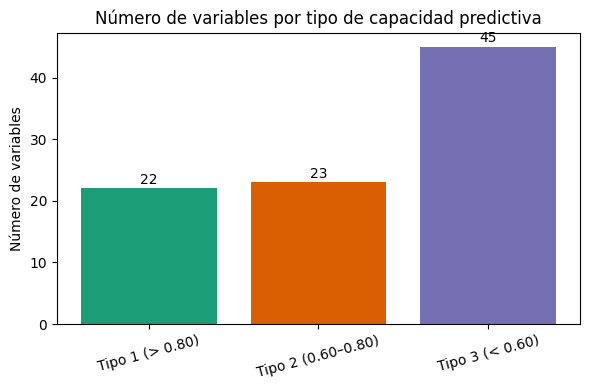

In [39]:
fig, ax = plt.subplots(figsize=(6,4))

ax.bar(counts.index, counts.values, color=colors)

for i, v in enumerate(counts.values):
    ax.text(i, v + 0.2, str(v), ha='center', va='bottom', fontsize=10)

ax.set_ylabel("Número de variables")
ax.set_title("Número de variables por tipo de capacidad predictiva")
ax.tick_params(axis='x', rotation=15)
plt.tight_layout()
plt.show()


In [ ]:
['estadio_ajcc','ecog','mut_kras','receptor_hormonal','programa_prevencion'
 ,'respuesta_previa','mut_braf','biopsia_tipo','metastasis','cuidados_paliativos'
 ,'t_invasivo','sexo','n_linfatico','aseguradora','tmb_alto','comite_tumores','psicooncologia',
 'mut_egfr','mut_pi3k','tipo_tumor','tratamiento_actual','region']

In [ ]:
['tiempo_traslado','soporte_familiar',
 'nivel_dieta','via_administracion',
 'hospital_tipo','nivel_estres',
 'habito_tabaco','pdl1_status'
 ,'her2_status','distancia_hospital',
 'habito_alcohol','calidad_sueno',
 'trat_linea','continuidad_asistencial',
 'calidad_historia_clinica','grado_histologico',
 'adherencia_tratamiento','centro_sanitario',
 'actividad_fisica','genotipo_riesgo','soporte_social','cohorte_estudio','variabilidad_laboratorio']

# añadimos 1 o 2 de las de 87 ,prueba de combinaciones

In [45]:
import itertools
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

# ============================================================
# 0. CONFIGURACIÓN
# ============================================================

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Usando dispositivo:", device)

# ----- 23 FEATURES BASE (todas categóricas en X_cat) -----
base_features = [
    'tiempo_traslado','soporte_familiar',
    'nivel_dieta','via_administracion',
    'hospital_tipo','nivel_estres',
    'habito_tabaco','pdl1_status',
    'her2_status','distancia_hospital',
    'habito_alcohol','calidad_sueno',
    'trat_linea','continuidad_asistencial',
    'calidad_historia_clinica','grado_histologico',
    'adherencia_tratamiento','centro_sanitario',
    'actividad_fisica','genotipo_riesgo',
    'soporte_social','cohorte_estudio',
    'variabilidad_laboratorio'
]

# ----- 22 FEATURES EXTRA ORIGINALES -----
# Quitamos 'ecog' y nos quedamos solo con categóricas
extra_features = [
    'estadio_ajcc',           # categórica
    # 'ecog',                 # <- QUITADA
    'mut_kras','receptor_hormonal','programa_prevencion',
    'respuesta_previa','mut_braf','biopsia_tipo','metastasis',
    'cuidados_paliativos','t_invasivo','sexo','n_linfatico',
    'aseguradora','tmb_alto','comite_tumores','psicooncologia',
    'mut_egfr','mut_pi3k','tipo_tumor','tratamiento_actual','region'
]

# Nos aseguramos de que todo está en X_cat
all_cat_cols = X_cat.columns.tolist()

missing_base  = [c for c in base_features  if c not in all_cat_cols]
missing_extra = [c for c in extra_features if c not in all_cat_cols]
if missing_base or missing_extra:
    print("OJO, faltan columnas en X_cat:")
    print("Base faltantes :", missing_base)
    print("Extra faltantes:", missing_extra)

# Trabajamos solo con X_cat (no usamos X_num)
X_all = X_cat.copy()

# ============================================================
# 1. SPLIT FIJO TRAIN / VALID / TEST
# ============================================================

idx_train, idx_temp, y_train, y_temp = train_test_split(
    X_all.index, y, test_size=0.2, random_state=42, stratify=y
)
idx_valid, idx_test, y_valid, y_test = train_test_split(
    idx_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

X_train_full = X_all.loc[idx_train]
X_valid_full = X_all.loc[idx_valid]
X_test_full  = X_all.loc[idx_test]

y_train_arr = np.array(y_train).astype("float32")
y_valid_arr = np.array(y_valid).astype("float32")
y_test_arr  = np.array(y_test).astype("float32")

print("Shapes ->",
      "Train:", X_train_full.shape,
      "Valid:", X_valid_full.shape,
      "Test:",  X_test_full.shape)

# ============================================================
# 2. RED NEURONAL SENCILLA
# ============================================================

class SimpleMLP(nn.Module):
    def __init__(self, n_features: int):
        super().__init__()
        self.fc1 = nn.Linear(n_features, 16)
        self.fc2 = nn.Linear(16, 32)
        self.out = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.atan(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.sigmoid(self.out(x))
        return x

# ============================================================
# 3. FUNCIÓN: PREPROCESAR (SOLO CAT) Y ENTRENAR/EVALUAR
# ============================================================

def train_and_eval(features_keep):
    """
    Usa 'features_keep' (todas categóricas en X_cat),
    las codifica con LabelEncoder y entrena una NN,
    devolviendo accuracy en test.
    """
    # Subset
    X_train = X_train_full[features_keep].copy()
    X_valid = X_valid_full[features_keep].copy()
    X_test  = X_test_full[features_keep].copy()

    # contenedores codificados
    X_train_enc = pd.DataFrame(index=X_train.index)
    X_valid_enc = pd.DataFrame(index=X_valid.index)
    X_test_enc  = pd.DataFrame(index=X_test.index)

    for col in features_keep:
        tr = X_train[col].astype(str).fillna("MISSING")
        va = X_valid[col].astype(str).fillna("MISSING")
        te = X_test[col].astype(str).fillna("MISSING")

        enc = LabelEncoder()
        tr_enc = enc.fit_transform(tr)

        known = set(enc.classes_)
        va = va.where(va.isin(known), other="MISSING")
        te = te.where(te.isin(known),  other="MISSING")

        va_enc = enc.transform(va)
        te_enc = enc.transform(te)

        X_train_enc[col] = tr_enc.astype("float32")
        X_valid_enc[col] = va_enc.astype("float32")
        X_test_enc[col]  = te_enc.astype("float32")

    X_train_np = X_train_enc.values.astype("float32")
    X_valid_np = X_valid_enc.values.astype("float32")
    X_test_np  = X_test_enc.values.astype("float32")

    # Tensores
    X_train_t = torch.from_numpy(X_train_np).float().to(device)
    y_train_t = torch.from_numpy(y_train_arr).unsqueeze(1).to(device)

    X_valid_t = torch.from_numpy(X_valid_np).float().to(device)
    y_valid_t = torch.from_numpy(y_valid_arr).unsqueeze(1).to(device)

    X_test_t = torch.from_numpy(X_test_np).float().to(device)
    y_test_t = torch.from_numpy(y_test_arr).unsqueeze(1).to(device)

    train_ds = TensorDataset(X_train_t, y_train_t)
    valid_ds = TensorDataset(X_valid_t, y_valid_t)
    test_ds  = TensorDataset(X_test_t,  y_test_t)

    train_loader = DataLoader(train_ds, batch_size=256, shuffle=True)
    valid_loader = DataLoader(valid_ds, batch_size=256, shuffle=False)
    test_loader  = DataLoader(test_ds,  batch_size=256, shuffle=False)

    # Modelo
    n_features = X_train_np.shape[1]
    model = SimpleMLP(n_features).to(device)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=1e-2, weight_decay=1e-4)

    # Entrenamiento corto
    num_epochs = 5
    for _ in range(num_epochs):
        model.train()
        for xb, yb in train_loader:
            xb = xb.to(device)
            yb = yb.to(device)
            optimizer.zero_grad()
            out = model(xb)
            loss = criterion(out, yb)
            loss.backward()
            optimizer.step()

        # valid opcional
        model.eval()
        with torch.no_grad():
            val_loss = 0.0
            for xb, yb in valid_loader:
                xb = xb.to(device)
                yb = yb.to(device)
                out = model(xb)
                loss = criterion(out, yb)
                val_loss += loss.item()
        val_loss /= max(1, len(valid_loader))

    # Evaluación en TEST
    model.eval()
    all_labels = []
    all_preds = []
    with torch.no_grad():
        for xb, yb in test_loader:
            xb = xb.to(device)
            yb = yb.to(device)
            probs = model(xb).squeeze(1)
            preds = (probs >= 0.5).long()
            all_labels.extend(yb.cpu().numpy().astype(int).ravel())
            all_preds.extend(preds.cpu().numpy().astype(int))

    acc = accuracy_score(all_labels, all_preds)
    return acc

# ============================================================
# 4. EXPERIMENTOS: BASE + 1 EXTRA, BASE + 2 EXTRAS
# ============================================================

results = []

# ---- BASE + 1 EXTRA ----
for extra in extra_features:
    feats_keep = base_features + [extra]
    acc = train_and_eval(feats_keep)
    results.append({
        "setting": "base+1",
        "n_base_features": len(base_features),
        "n_extra_features": 1,
        "extras_added": [extra],
        "total_features_used": len(feats_keep),
        "accuracy_test": acc
    })
    print(f"Base + {extra:20s} | n={len(feats_keep):2d} | acc_test={acc:.4f}")

# ---- BASE + 2 EXTRAS ----
for extra_pair in itertools.combinations(extra_features, 2):
    feats_keep = base_features + list(extra_pair)
    acc = train_and_eval(feats_keep)
    results.append({
        "setting": "base+2",
        "n_base_features": len(base_features),
        "n_extra_features": 2,
        "extras_added": list(extra_pair),
        "total_features_used": len(feats_keep),
        "accuracy_test": acc
    })
    print(f"Base + {extra_pair} | n={len(feats_keep):2d} | acc_test={acc:.4f}")

# ============================================================
# 5. TABLA FINAL
# ============================================================

results_df = (
    pd.DataFrame(results)
      .sort_values("accuracy_test", ascending=False)
      .reset_index(drop=True)
)

print("\n===== Resultados NN (base + extras, solo categóricas, sin ecog) =====")
print(results_df)

results_df.to_csv("nn_base_plus_extras_only_cat_no_ecog.csv", index=False)
print("\nResultados guardados en 'nn_base_plus_extras_only_cat_no_ecog.csv'")


Usando dispositivo: cuda
Shapes -> Train: (32000, 44) Valid: (4000, 44) Test: (4000, 44)
Base + estadio_ajcc         | n=24 | acc_test=0.8795
Base + mut_kras             | n=24 | acc_test=0.8782
Base + receptor_hormonal    | n=24 | acc_test=0.8785
Base + programa_prevencion  | n=24 | acc_test=0.8790
Base + respuesta_previa     | n=24 | acc_test=0.8780
Base + mut_braf             | n=24 | acc_test=0.8782
Base + biopsia_tipo         | n=24 | acc_test=0.8782
Base + metastasis           | n=24 | acc_test=0.8780
Base + cuidados_paliativos  | n=24 | acc_test=0.8772
Base + t_invasivo           | n=24 | acc_test=0.8780
Base + sexo                 | n=24 | acc_test=0.8780
Base + n_linfatico          | n=24 | acc_test=0.8778
Base + aseguradora          | n=24 | acc_test=0.8770
Base + tmb_alto             | n=24 | acc_test=0.8782
Base + comite_tumores       | n=24 | acc_test=0.8782
Base + psicooncologia       | n=24 | acc_test=0.8762
Base + mut_egfr             | n=24 | acc_test=0.8775
Base + mut

In [52]:
# de results_df dame los que sean menor que 0.87 en accuracy_test
results_df[results_df['accuracy_test'] < 0.87]

setting  n_base_features  n_extra_features  \
225  base+2               23                 2   
226  base+1               23                 1   
227  base+2               23                 2   
228  base+1               23                 1   
229  base+1               23                 1   
230  base+2               23                 2   

                         extras_added  total_features_used  accuracy_test  \
225  [tipo_tumor, tratamiento_actual]                   25        0.84550   
226                      [tipo_tumor]                   24        0.84375   
227              [tipo_tumor, region]                   25        0.84375   
228              [tratamiento_actual]                   24        0.82600   
229                          [region]                   24        0.82550   
230      [tratamiento_actual, region]                   25        0.82525   

    acc_group  
225    < 0.87  
226    < 0.87  
227    < 0.87  
228    < 0.87  
229    < 0.87  
230    < 0.87

acc_group  < 0.87  >= 0.87
setting                   
base+1          3       18
base+2          3      207


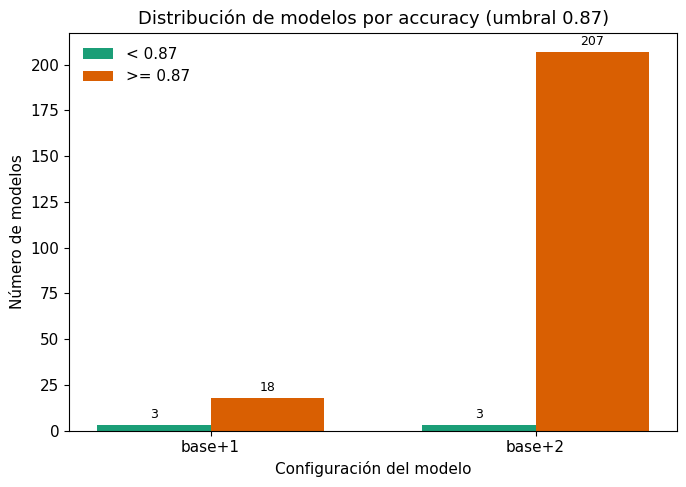

In [51]:
import numpy as np
import matplotlib.pyplot as plt

# Umbral de accuracy
threshold = 0.87

# Clasificamos cada fila según el umbral
results_df["acc_group"] = np.where(
    results_df["accuracy_test"] >= threshold,
    f">= {threshold:.2f}",
    f"< {threshold:.2f}"
)

# Contamos por setting (base+1 / base+2) y grupo de accuracy
counts = (
    results_df
    .groupby(["setting", "acc_group"])
    .size()
    .unstack(fill_value=0)
    .reindex(index=["base+1", "base+2"])  # aseguramos orden en el eje X
)

print(counts)

# ───────────── Gráfico de barras agrupadas ─────────────
labels = counts.index.tolist()
groups = counts.columns.tolist()

x = np.arange(len(labels))
width = 0.35  # ancho de cada barra

fig, ax = plt.subplots(figsize=(7,5))

bar1 = ax.bar(x - width/2, counts[groups[0]], width, label=groups[0], color="#1b9e77")
bar2 = ax.bar(x + width/2, counts[groups[1]], width, label=groups[1], color="#d95f02")

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel("Número de modelos")
ax.set_xlabel("Configuración del modelo")
ax.set_title(f"Distribución de modelos por accuracy (umbral {threshold:.2f})")

ax.legend(frameon=False)

# Añadimos etiquetas encima de cada barra
def autolabel(bars):
    for b in bars:
        height = b.get_height()
        ax.annotate(
            f'{int(height)}',
            xy=(b.get_x() + b.get_width() / 2, height),
            xytext=(0, 3),
            textcoords="offset points",
            ha="center", va="bottom", fontsize=9
        )

autolabel(bar1)
autolabel(bar2)

plt.tight_layout()
plt.show()


# prueba de iteraciones con numericas

In [59]:
import itertools
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import accuracy_score

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

# ============================================================
# 0. CONFIGURACIÓN
# ============================================================

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Usando dispositivo:", device)

# ----- NUMÉRICAS: todas menos ecog -----
num_cols_all = X_num.columns.tolist()
num_features = [c for c in num_cols_all if c.lower() != "ecog"]

print("Numéricas usadas (sin ecog):", num_features)

# ----- 23 FEATURES BASE (categóricas) -----
base_features = [
    'tiempo_traslado','soporte_familiar',
    'nivel_dieta','via_administracion',
    'hospital_tipo','nivel_estres',
    'habito_tabaco','pdl1_status',
    'her2_status','distancia_hospital',
    'habito_alcohol','calidad_sueno',
    'trat_linea','continuidad_asistencial',
    'calidad_historia_clinica','grado_histologico',
    'adherencia_tratamiento','centro_sanitario',
    'actividad_fisica','genotipo_riesgo',
    'soporte_social','cohorte_estudio',
    'variabilidad_laboratorio'
]

# ----- EXTRAS (sin ecog, pueden ser numéricas o categóricas) -----
extra_features = [
    'estadio_ajcc','mut_kras','receptor_hormonal','programa_prevencion',
    'respuesta_previa','mut_braf','biopsia_tipo','metastasis','cuidados_paliativos',
    't_invasivo','sexo','n_linfatico','aseguradora','tmb_alto','comite_tumores',
    'psicooncologia','mut_egfr','mut_pi3k','tipo_tumor','tratamiento_actual','region'
]

# Comprobamos que existen en X_num o X_cat
cat_cols_all = X_cat.columns.tolist()
all_cols = set(num_cols_all) | set(cat_cols_all)

missing_base  = [c for c in base_features  if c not in all_cols]
missing_extra = [c for c in extra_features if c not in all_cols]
if missing_base or missing_extra:
    print("⚠️ OJO, faltan columnas en los dataframes originales:")
    print("Base faltantes :", missing_base)
    print("Extra faltantes:", missing_extra)

# ============================================================
# 1. SPLIT FIJO TRAIN / VALID / TEST
# ============================================================

# Unimos numéricas + categóricas sin transformar
X_all = pd.concat([X_num, X_cat], axis=1)

idx_train, idx_temp, y_train, y_temp = train_test_split(
    X_all.index, y, test_size=0.2, random_state=42, stratify=y
)
idx_valid, idx_test, y_valid, y_test = train_test_split(
    idx_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

X_train_full = X_all.loc[idx_train]
X_valid_full = X_all.loc[idx_valid]
X_test_full  = X_all.loc[idx_test]

y_train_arr = np.array(y_train).astype("float32")
y_valid_arr = np.array(y_valid).astype("float32")
y_test_arr  = np.array(y_test).astype("float32")

print("Shapes ->",
      "Train:", X_train_full.shape,
      "Valid:", X_valid_full.shape,
      "Test:",  X_test_full.shape)

num_cols = X_num.columns.tolist()
cat_cols = X_cat.columns.tolist()

# ============================================================
# 2. RED NEURONAL SENCILLA
# ============================================================

class SimpleMLP(nn.Module):
    def __init__(self, n_features: int):
        super().__init__()
        self.fc1 = nn.Linear(n_features, 16)
        self.fc2 = nn.Linear(16, 32)
        self.out = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.atan(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.sigmoid(self.out(x))
        return x

# ============================================================
# 3. FUNCIÓN: PREPROCESAR (num + cat) Y ENTRENAR/EVALUAR NN
# ============================================================

def train_and_eval(features_keep):
    """
    Usa 'features_keep' (mezcla de numéricas y categóricas),
    las preprocesa y entrena una NN, devolviendo accuracy en test.
    """
    # Quitamos duplicados manteniendo el orden
    features_keep = list(dict.fromkeys(features_keep))

    # Subset
    X_train = X_train_full[features_keep].copy()
    X_valid = X_valid_full[features_keep].copy()
    X_test  = X_test_full[features_keep].copy()

    X_train_enc_list = []
    X_valid_enc_list = []
    X_test_enc_list  = []

    for col in features_keep:
        if col in num_cols:
            # Numérica: mediana + flag missing + MinMax
            tr = X_train[col].copy()
            va = X_valid[col].copy()
            te = X_test[col].copy()

            median = tr.median()

            tr_missing = tr.isna().astype("float32").values.reshape(-1, 1)
            va_missing = va.isna().astype("float32").values.reshape(-1, 1)
            te_missing = te.isna().astype("float32").values.reshape(-1, 1)

            tr_filled = tr.fillna(median).astype("float32").values.reshape(-1, 1)
            va_filled = va.fillna(median).astype("float32").values.reshape(-1, 1)
            te_filled = te.fillna(median).astype("float32").values.reshape(-1, 1)

            scaler = MinMaxScaler(feature_range=(0.0, 1.0))
            scaler.fit(tr_filled)
            tr_scaled = scaler.transform(tr_filled)
            va_scaled = scaler.transform(va_filled)
            te_scaled = scaler.transform(te_filled)

            X_train_enc_list.append(np.hstack([tr_scaled, tr_missing]))
            X_valid_enc_list.append(np.hstack([va_scaled, va_missing]))
            X_test_enc_list.append(np.hstack([te_scaled, te_missing]))

        elif col in cat_cols:
            # Categórica: MISSING + LabelEncoder
            tr = X_train[col].astype(str).fillna("MISSING")
            va = X_valid[col].astype(str).fillna("MISSING")
            te = X_test[col].astype(str).fillna("MISSING")

            enc = LabelEncoder()
            tr_enc = enc.fit_transform(tr)

            known = set(enc.classes_)
            va = va.where(va.isin(known), other="MISSING")
            te = te.where(te.isin(known),  other="MISSING")

            va_enc = enc.transform(va)
            te_enc = enc.transform(te)

            X_train_enc_list.append(tr_enc.reshape(-1, 1).astype("float32"))
            X_valid_enc_list.append(va_enc.reshape(-1, 1).astype("float32"))
            X_test_enc_list.append(te_enc.reshape(-1, 1).astype("float32"))
        else:
            raise ValueError(f"Columna {col} no está ni en X_num ni en X_cat")

    # Concatenamos todas las columnas transformadas
    X_train_np = np.hstack(X_train_enc_list)
    X_valid_np = np.hstack(X_valid_enc_list)
    X_test_np  = np.hstack(X_test_enc_list)

    # Tensores
    X_train_t = torch.from_numpy(X_train_np).float().to(device)
    y_train_t = torch.from_numpy(y_train_arr).unsqueeze(1).to(device)

    X_valid_t = torch.from_numpy(X_valid_np).float().to(device)
    y_valid_t = torch.from_numpy(y_valid_arr).unsqueeze(1).to(device)

    X_test_t = torch.from_numpy(X_test_np).float().to(device)
    y_test_t = torch.from_numpy(y_test_arr).unsqueeze(1).to(device)

    train_ds = TensorDataset(X_train_t, y_train_t)
    valid_ds = TensorDataset(X_valid_t, y_valid_t)
    test_ds  = TensorDataset(X_test_t,  y_test_t)

    train_loader = DataLoader(train_ds, batch_size=256, shuffle=True)
    valid_loader = DataLoader(valid_ds, batch_size=256, shuffle=False)
    test_loader  = DataLoader(test_ds,  batch_size=256, shuffle=False)

    # Modelo
    n_features = X_train_np.shape[1]
    model = SimpleMLP(n_features).to(device)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=1e-2, weight_decay=1e-4)

    # Entrenamiento corto
    num_epochs = 4
    for _ in range(num_epochs):
        model.train()
        for xb, yb in train_loader:
            xb = xb.to(device)
            yb = yb.to(device)
            optimizer.zero_grad()
            out = model(xb)
            loss = criterion(out, yb)
            loss.backward()
            optimizer.step()

        # valid opcional
        model.eval()
        with torch.no_grad():
            val_loss = 0.0
            for xb, yb in valid_loader:
                xb = xb.to(device)
                yb = yb.to(device)
                out = model(xb)
                loss = criterion(out, yb)
                val_loss += loss.item()
        val_loss /= max(1, len(valid_loader))

    # Evaluación en TEST
    model.eval()
    all_labels = []
    all_preds = []
    with torch.no_grad():
        for xb, yb in test_loader:
            xb = xb.to(device)
            yb = yb.to(device)
            probs = model(xb).squeeze(1)
            preds = (probs >= 0.5).long()
            all_labels.extend(yb.cpu().numpy().astype(int).ravel())
            all_preds.extend(preds.cpu().numpy().astype(int))

    acc = accuracy_score(all_labels, all_preds)
    return acc

# ============================================================
# 4. EXPERIMENTOS: NUMÉRICAS (sin ecog) + BASE + 1 EXTRA / 2 EXTRAS
# ============================================================

results = []

# Conjunto base del modelo: numéricas (sin ecog) + base categóricas
features_base_model = num_features + base_features

# --- Opcional: baseline solo con num + base, sin extras ---
acc_base = train_and_eval(features_base_model)
results.append({
    "setting": "base_only",
    "n_num_features": len(num_features),
    "n_base_features": len(base_features),
    "n_extra_features": 0,
    "extras_added": [],
    "total_features_used": len(list(dict.fromkeys(features_base_model))),
    "accuracy_test": acc_base
})
print(f"BASE SOLO (num + base) | n={len(features_base_model)} | acc_test={acc_base:.4f}")

# ---- BASE + 1 EXTRA ----
for extra in extra_features:
    feats_keep = features_base_model + [extra]
    acc = train_and_eval(feats_keep)
    results.append({
        "setting": "base+1",
        "n_num_features": len(num_features),
        "n_base_features": len(base_features),
        "n_extra_features": 1,
        "extras_added": [extra],
        "total_features_used": len(list(dict.fromkeys(feats_keep))),
        "accuracy_test": acc
    })
    print(f"Base(num+base) + {extra:20s} | acc_test={acc:.4f}")

# ---- BASE + 2 EXTRAS ----
for extra_pair in itertools.combinations(extra_features, 2):
    feats_keep = features_base_model + list(extra_pair)
    acc = train_and_eval(feats_keep)
    results.append({
        "setting": "base+2",
        "n_num_features": len(num_features),
        "n_base_features": len(base_features),
        "n_extra_features": 2,
        "extras_added": list(extra_pair),
        "total_features_used": len(list(dict.fromkeys(feats_keep))),
        "accuracy_test": acc
    })
    print(f"Base(num+base) + {extra_pair} | acc_test={acc:.4f}")

# ============================================================
# 5. TABLA FINAL
# ============================================================

results_df = (
    pd.DataFrame(results)
      .sort_values("accuracy_test", ascending=False)
      .reset_index(drop=True)
)

print("\n===== Resultados NN (num sin ecog + base + extras) =====")
print(results_df)

results_df.to_csv("nn_num_sin_ecog_base_plus_extras.csv", index=False)
print("\nResultados guardados en 'nn_num_sin_ecog_base_plus_extras.csv'")


Usando dispositivo: cuda
Numéricas usadas (sin ecog): ['edad', 'imc', 'dias_desde_diagnostico', 'sesiones_quimio', 'hemoglobina', 'hematocrito', 'eritrocitos', 'leucocitos', 'neutrofilos', 'linfocitos', 'monocitos', 'eosinofilos', 'basofilos', 'plaquetas', 'vcm', 'hcm', 'chcm', 'rdw', 'glucosa', 'hba1c', 'urea', 'creatinina', 'sodio', 'potasio', 'cloro', 'calcio', 'fosforo', 'magnesio', 'ast', 'alt', 'ggt', 'fosfatasa_alcalina', 'bilirrubina_total', 'albumina', 'proteinas_totales', 'pcr', 'vsg', 'ferritina', 'ldh', 'colesterol_total', 'hdl', 'ldl', 'trigliceridos', 'glutation', 'vitamina_d']
Shapes -> Train: (32000, 90) Valid: (4000, 90) Test: (4000, 90)
BASE SOLO (num + base) | n=68 | acc_test=0.7857
Base(num+base) + estadio_ajcc         | acc_test=0.8792
Base(num+base) + mut_kras             | acc_test=0.8782
Base(num+base) + receptor_hormonal    | acc_test=0.8790
Base(num+base) + programa_prevencion  | acc_test=0.8790
Base(num+base) + respuesta_previa     | acc_test=0.8770
Base(num+

In [61]:
# de results_df dame los que sean menor que 0.87 en accuracy_test
results_df[results_df['accuracy_test'] < 0.86]

setting  n_num_features  n_base_features  n_extra_features  \
225     base+2              45               23                 2   
226     base+2              45               23                 2   
227     base+1              45               23                 1   
228     base+2              45               23                 2   
229     base+1              45               23                 1   
230     base+1              45               23                 1   
231  base_only              45               23                 0   

                         extras_added  total_features_used  accuracy_test  
225  [tipo_tumor, tratamiento_actual]                   70        0.84650  
226              [tipo_tumor, region]                   70        0.84625  
227                      [tipo_tumor]                   69        0.84575  
228      [tratamiento_actual, region]                   70        0.83050  
229                          [region]                   69        0.82675  
230              [tratamiento_actual]                   69        0.81700  
231                                []                   68        0.78575

acc_group  < 0.87  >= 0.87
setting                   
base+1          3       18
base+2          4      206


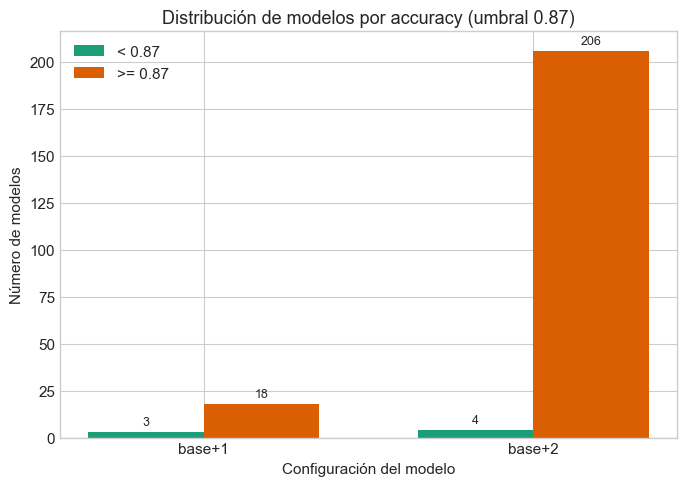

In [62]:
import numpy as np
import matplotlib.pyplot as plt

# Umbral de accuracy
threshold = 0.87

# Clasificamos cada fila según el umbral
results_df["acc_group"] = np.where(
    results_df["accuracy_test"] >= threshold,
    f">= {threshold:.2f}",
    f"< {threshold:.2f}"
)

# Contamos por setting (base+1 / base+2) y grupo de accuracy
counts = (
    results_df
    .groupby(["setting", "acc_group"])
    .size()
    .unstack(fill_value=0)
    .reindex(index=["base+1", "base+2"])  # aseguramos orden en el eje X
)

print(counts)

# ───────────── Gráfico de barras agrupadas ─────────────
labels = counts.index.tolist()
groups = counts.columns.tolist()

x = np.arange(len(labels))
width = 0.35  # ancho de cada barra

fig, ax = plt.subplots(figsize=(7,5))

bar1 = ax.bar(x - width/2, counts[groups[0]], width, label=groups[0], color="#1b9e77")
bar2 = ax.bar(x + width/2, counts[groups[1]], width, label=groups[1], color="#d95f02")

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel("Número de modelos")
ax.set_xlabel("Configuración del modelo")
ax.set_title(f"Distribución de modelos por accuracy (umbral {threshold:.2f})")

ax.legend(frameon=False)

# Añadimos etiquetas encima de cada barra
def autolabel(bars):
    for b in bars:
        height = b.get_height()
        ax.annotate(
            f'{int(height)}',
            xy=(b.get_x() + b.get_width() / 2, height),
            xytext=(0, 3),
            textcoords="offset points",
            ha="center", va="bottom", fontsize=9
        )

autolabel(bar1)
autolabel(bar2)

plt.tight_layout()
plt.show()


# modelo de ramdon forest simple

Variables eliminadas realmente: []
Shape después de eliminar: (40000, 71)
Codificación categórica lista.


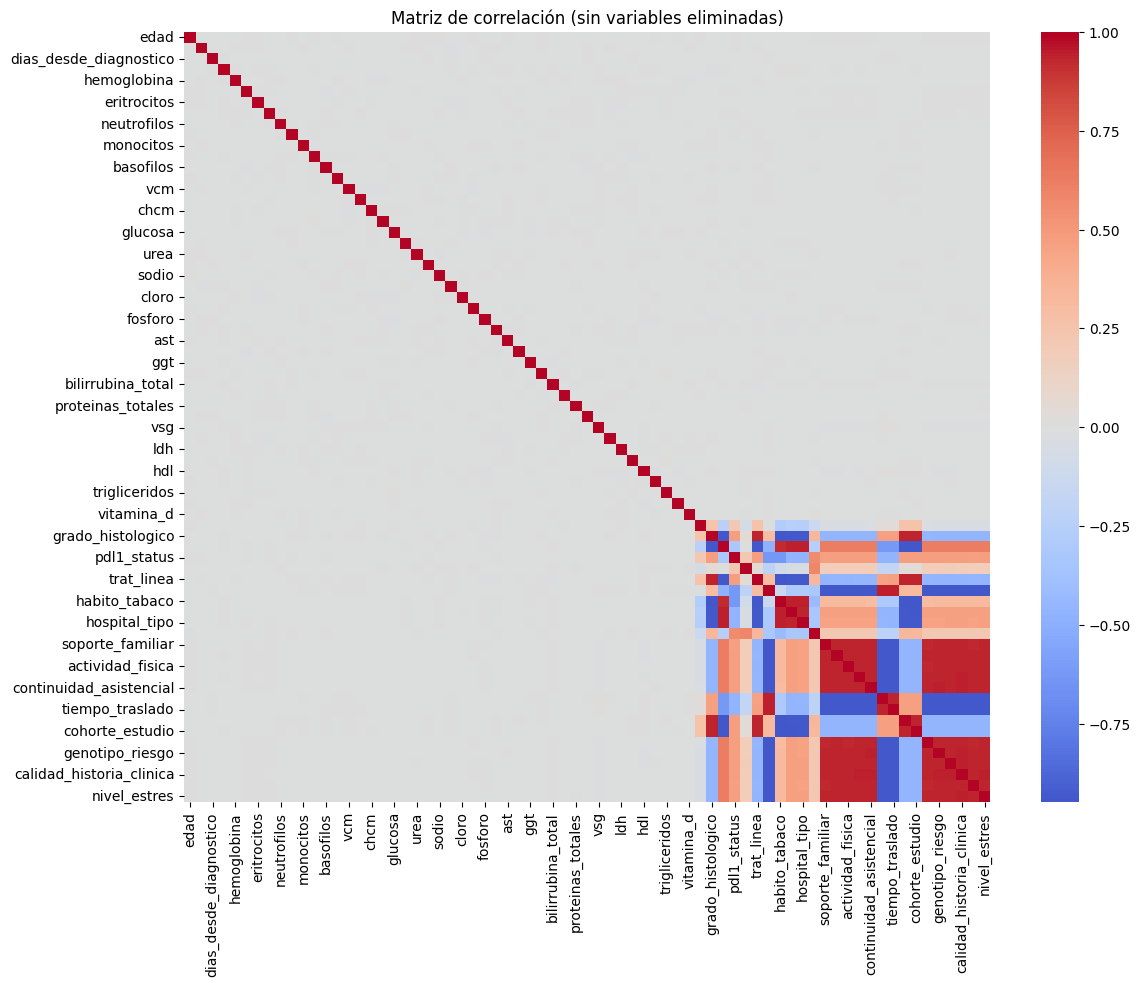


==================== RESULTADOS RANDOM FOREST ====================
Accuracy =  0.844
AUC ROC  =  0.9135217416819146

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.84      0.83      3776
           1       0.85      0.85      0.85      4224

    accuracy                           0.84      8000
   macro avg       0.84      0.84      0.84      8000
weighted avg       0.84      0.84      0.84      8000



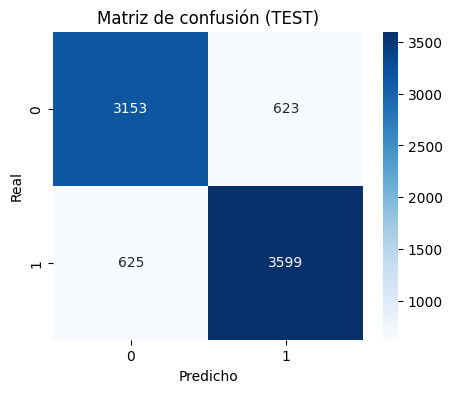


Feature Importances:
                    feature  importance
45               tipo_tumor    0.054916
66          genotipo_riesgo    0.043258
52            habito_tabaco    0.042221
53           habito_alcohol    0.040923
60  continuidad_asistencial    0.038338
..                      ...         ...
12                basofilos    0.008167
0                      edad    0.007900
62          tiempo_traslado    0.007437
3           sesiones_quimio    0.005741
61       distancia_hospital    0.002229

[71 rows x 2 columns]


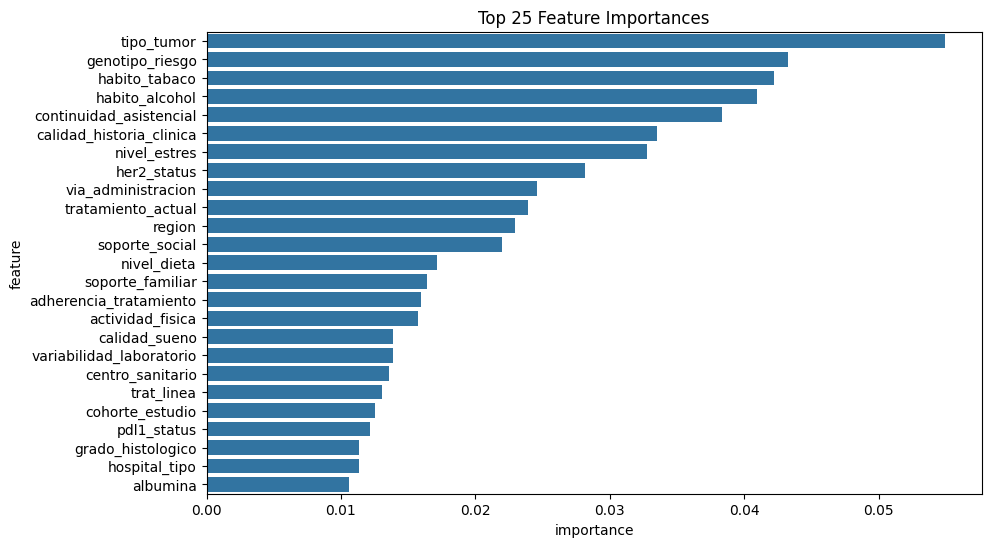

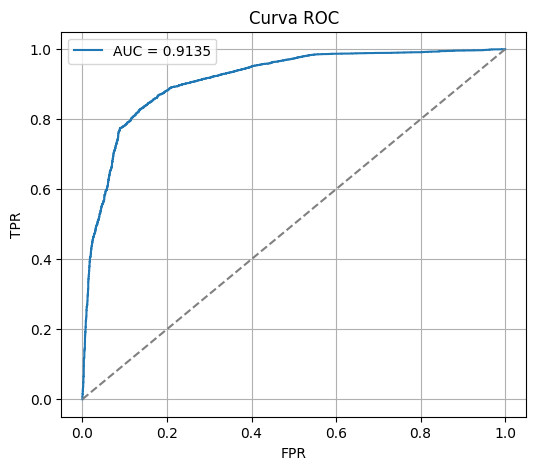

In [26]:
# ============================================================
# 0. IMPORTS
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_auc_score, roc_curve
)
from sklearn.ensemble import RandomForestClassifier

# ============================================================
# 1. VARIABLES A ELIMINAR
# ============================================================

vars_drop = [
    'estadio_ajcc','ecog','mut_kras','receptor_hormonal','programa_prevencion',
    'respuesta_previa','mut_braf','biopsia_tipo','metastasis','cuidados_paliativos',
    't_invasivo','sexo','n_linfatico','aseguradora','tmb_alto','comite_tumores',
    'psicooncologia','mut_egfr','mut_pi3k'
]

# ============================================================
# 2. CONSTRUIR DATAFRAME COMPLETO Y ELIMINAR VARIABLES
# ============================================================

X_full = pd.concat([X_num, X_cat], axis=1)

# eliminar columnas si existen
vars_drop_real = [v for v in vars_drop if v in X_full.columns]
X_full = X_full.drop(columns=vars_drop_real)

print("Variables eliminadas realmente:", vars_drop_real)
print("Shape después de eliminar:", X_full.shape)

# ============================================================
# 3. SPLIT TRAIN / VALID / TEST
# ============================================================

X_train, X_test, y_train, y_test = train_test_split(
    X_full, y, test_size=0.2, random_state=42, stratify=y
)

# ============================================================
# 4. PROCESAR CATEGÓRICAS (LabelEncoder)
# ============================================================

X_train_enc = X_train.copy()
X_test_enc  = X_test.copy()

cat_cols = X_cat.columns.tolist()
label_encoders = {}

for col in cat_cols:
    if col in X_train_enc.columns:
        enc = LabelEncoder()
        X_train_enc[col] = enc.fit_transform(X_train_enc[col].astype(str))
        # transformar test
        known = set(enc.classes_)
        X_test_enc[col] = (
            X_test_enc[col].astype(str)
                .where(X_test_enc[col].astype(str).isin(known), other="MISSING")
        )
        X_test_enc[col] = enc.transform(X_test_enc[col].astype(str))
        label_encoders[col] = enc

print("Codificación categórica lista.")

# ============================================================
# 5. MATRIZ DE CORRELACIÓN DE VARIABLES RESTANTES
# ============================================================

plt.figure(figsize=(13,10))
corr = X_train_enc.corr()
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Matriz de correlación (sin variables eliminadas)")
plt.show()

# ============================================================
# 6. ENTRENAR RANDOM FOREST
# ============================================================

rf = RandomForestClassifier(
    n_estimators=600,
    max_depth=None,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train_enc, y_train)

# ============================================================
# 7. PREDICCIONES Y MÉTRICAS
# ============================================================

y_pred = rf.predict(X_test_enc)
y_prob = rf.predict_proba(X_test_enc)[:,1]

acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

print("\n==================== RESULTADOS RANDOM FOREST ====================")
print("Accuracy = ", acc)
print("AUC ROC  = ", auc)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ============================================================
# 8. MATRIZ DE CONFUSIÓN
# ============================================================

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de confusión (TEST)")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.show()

# ============================================================
# 9. FEATURE IMPORTANCE
# ============================================================

fi = pd.DataFrame({
    "feature": X_train_enc.columns,
    "importance": rf.feature_importances_
}).sort_values(by="importance", ascending=False)

print("\nFeature Importances:")
print(fi)

plt.figure(figsize=(10,6))
sns.barplot(data=fi.head(25), x="importance", y="feature")
plt.title("Top 25 Feature Importances")
plt.show()

# ============================================================
# 10. CURVA ROC
# ============================================================

fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {auc:.4f}")
plt.plot([0,1], [0,1], "--", color="gray")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Curva ROC")
plt.legend()
plt.grid(True)
plt.show()


# prediccion de Ramdom forest com limpio

Número de pacientes nuevos: 5000
Predichos clase 1: 2631
Predichos clase 0: 2369
Probabilidad media clase 1: 0.5305435644029202


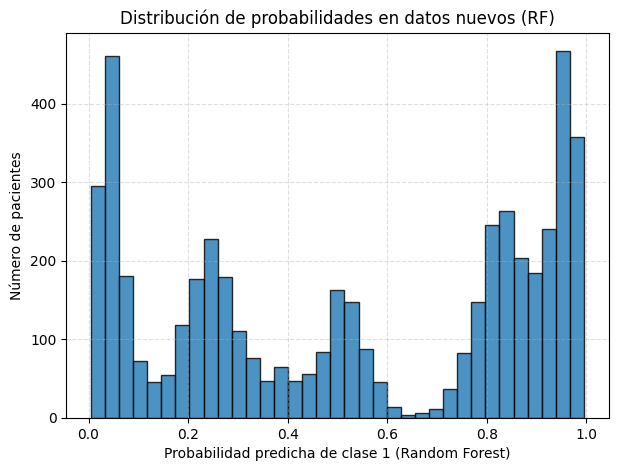

Archivo guardado: onc_fresh_con_predicciones_rf.csv


In [27]:
# ============================================================
# 11. PREDICCIÓN EN DATOS NUEVOS (limpio) + HISTOGRAMA
# ============================================================

# Cargar datos limpios
df_new = pd.read_csv("onc_fresh_full_no_target.csv")

# Eliminar las mismas variables que eliminaste en train
df_new = df_new.drop(columns=[c for c in vars_drop_real if c in df_new.columns])

# Hacemos copia para trabajar
X_new = df_new.copy()

# Procesar categóricas con los mismos label encoders usados en train
for col in cat_cols:
    if col in X_new.columns:
        X_new[col] = X_new[col].astype(str).fillna("MISSING")

        if col in label_encoders:
            enc = label_encoders[col]
            known = set(enc.classes_)
            # reemplazar categorías desconocidas por MISSING
            X_new_col = X_new[col].where(X_new[col].isin(known), other="MISSING")
            X_new[col] = enc.transform(X_new_col.astype(str))
        else:
            # columna categórica que no quedó tras eliminar variables
            pass

# Asegurar que columnas coinciden entre train y new (en orden)
X_new = X_new[X_train_enc.columns]

# Predicción
probs_new = rf.predict_proba(X_new)[:, 1]
preds_new = (probs_new >= 0.5).astype(int)

print("Número de pacientes nuevos:", len(probs_new))
print("Predichos clase 1:", preds_new.sum())
print("Predichos clase 0:", (preds_new == 0).sum())
print("Probabilidad media clase 1:", probs_new.mean())

# ============================================================
# HISTOGRAMA / DISTRIBUCIÓN DE PROBABILIDADES
# ============================================================

plt.figure(figsize=(7,5))
plt.hist(probs_new, bins=35, edgecolor="black", alpha=0.8)
plt.xlabel("Probabilidad predicha de clase 1 (Random Forest)")
plt.ylabel("Número de pacientes")
plt.title("Distribución de probabilidades en datos nuevos (RF)")
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()

# Guardar archivo con predicciones
salida_rf = df_new.copy()
salida_rf["prob_clase_1"] = probs_new
salida_rf["pred_clase"] = preds_new

salida_rf.to_csv("onc_fresh_con_predicciones_rf.csv", index=False)
print("Archivo guardado: onc_fresh_con_predicciones_rf.csv")


# demostracion que el modelo no avanza

Codificación categórica lista.
Shape train codificado: (32000, 90)

Accuracy modelo base (sin quitar nada): 0.8764

Top 20 features más importantes (modelo base):
                feature  importance
64         biopsia_tipo    0.055673
48         estadio_ajcc    0.054386
57             mut_braf    0.044449
45                 ecog    0.040566
53    receptor_hormonal    0.037044
59             mut_pi3k    0.036072
78  cuidados_paliativos    0.029122
76  programa_prevencion    0.029037
70          aseguradora    0.028704
49           t_invasivo    0.027109
58             mut_egfr    0.026572
60             tmb_alto    0.024455
50          n_linfatico    0.022899
51           metastasis    0.022746
46                 sexo    0.018143
77       comite_tumores    0.017119
56             mut_kras    0.016994
75       psicooncologia    0.016526
33             albumina    0.009801
27             magnesio    0.009380

Top 16 features que iremos quitando de dos en dos:
['biopsia_tipo', 'estadio_ajc

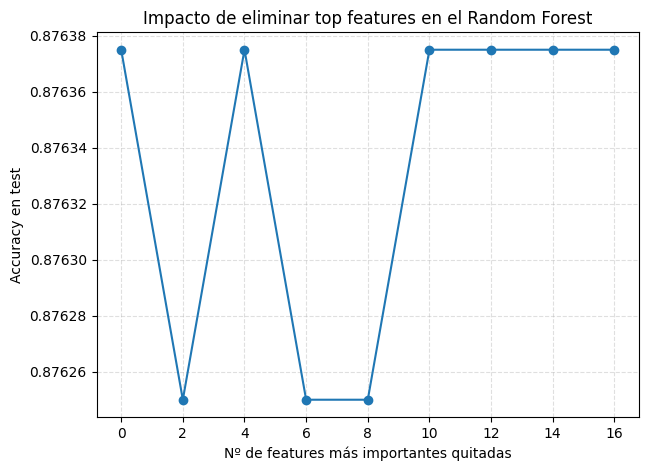

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# ============================================================
# 1. UNIR NUMÉRICAS + CATEGÓRICAS
# ============================================================

X_full = pd.concat([X_num, X_cat], axis=1)
feature_names_all = X_full.columns.tolist()

cat_cols = X_cat.columns.tolist()

# ============================================================
# 2. TRAIN / TEST SPLIT (sin valid, solo para RF)
# ============================================================

X_train, X_test, y_train, y_test = train_test_split(
    X_full, y, test_size=0.2, random_state=42, stratify=y
)

# ============================================================
# 3. ENCODING CATEGÓRICAS CON LABELENCODER (SOLO UNA VEZ)
# ============================================================

X_train_enc = X_train.copy()
X_test_enc  = X_test.copy()

label_encoders = {}
for col in cat_cols:
    if col in X_train_enc.columns:
        enc = LabelEncoder()
        X_train_enc[col] = enc.fit_transform(X_train_enc[col].astype(str))

        known = set(enc.classes_)
        X_test_enc[col] = (
            X_test_enc[col].astype(str)
                           .where(X_test_enc[col].astype(str).isin(known), other="MISSING")
        )
        X_test_enc[col] = enc.transform(X_test_enc[col].astype(str))
        label_encoders[col] = enc

print("Codificación categórica lista.")
print("Shape train codificado:", X_train_enc.shape)

# ============================================================
# 4. RANDOM FOREST CON TODAS LAS FEATURES (BASE)
# ============================================================

rf_base = RandomForestClassifier(
    n_estimators=500,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)
rf_base.fit(X_train_enc, y_train)

y_pred_base = rf_base.predict(X_test_enc)
acc_base = accuracy_score(y_test, y_pred_base)

print(f"\nAccuracy modelo base (sin quitar nada): {acc_base:.4f}")

# Importancias
importances = rf_base.feature_importances_
fi_all = pd.DataFrame({
    "feature": X_train_enc.columns,
    "importance": importances
}).sort_values("importance", ascending=False)

print("\nTop 20 features más importantes (modelo base):")
print(fi_all.head(20))

# Tomamos las 16 más importantes (pueden ser numéricas o categóricas)
top16_feats = fi_all["feature"].head(16).tolist()
print("\nTop 16 features que iremos quitando de dos en dos:")
print(top16_feats)

# ============================================================
# 5. EXPERIMENTO: QUITAR TOP FEATURES DE 2 EN 2 Y MEDIR ACCURACY
# ============================================================

results = []

# lista de números de features a quitar: 0, 2, 4, ..., 16
k_values = list(range(0, 17, 2))

for k in k_values:
    feats_to_drop = top16_feats[:k]  # primeras k más importantes
    X_train_k = X_train_enc.drop(columns=feats_to_drop)
    X_test_k  = X_test_enc.drop(columns=feats_to_drop)

    rf_k = RandomForestClassifier(
        n_estimators=500,
        max_depth=None,
        random_state=42,
        n_jobs=-1
    )
    rf_k.fit(X_train_k, y_train)
    y_pred_k = rf_k.predict(X_test_k)
    acc_k = accuracy_score(y_test, y_pred_k)

    results.append({
        "n_top_features_removed": k,
        "removed_features": feats_to_drop,
        "n_features_used": X_train_k.shape[1],
        "accuracy_test": acc_k
    })

    print(f"Quitadas {k:2d} top features -> n_features = {X_train_k.shape[1]:3d} | acc = {acc_k:.4f}")

# ============================================================
# 6. TABLA DE RESULTADOS
# ============================================================

results_df = pd.DataFrame(results).sort_values("n_top_features_removed").reset_index(drop=True)
print("\n===== Tabla resultados RF quitando top features de 2 en 2 =====")
print(results_df[["n_top_features_removed", "n_features_used", "accuracy_test"]])

# ============================================================
# 7. GRÁFICO: Nº FEATURES TOP QUITADAS vs ACCURACY
# ============================================================

plt.figure(figsize=(7,5))
plt.plot(results_df["n_top_features_removed"], results_df["accuracy_test"], marker="o")
plt.xticks(results_df["n_top_features_removed"])
plt.xlabel("Nº de features más importantes quitadas")
plt.ylabel("Accuracy en test")
plt.title("Impacto de eliminar top features en el Random Forest")
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()


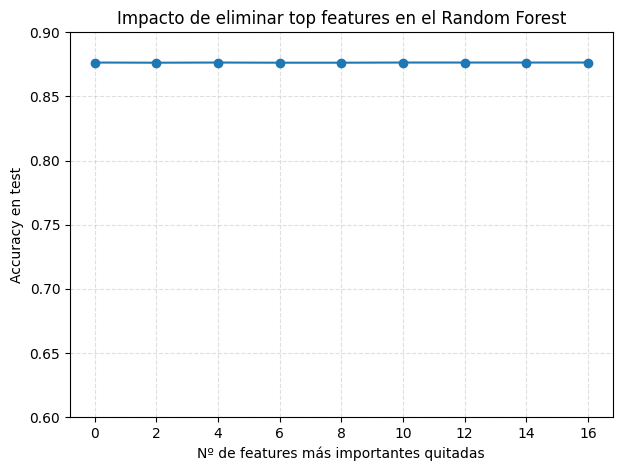

In [41]:
from matplotlib.ticker import FormatStrFormatter

plt.figure(figsize=(7,5))
plt.plot(results_df["n_top_features_removed"], results_df["accuracy_test"], marker="o")
plt.xticks(results_df["n_top_features_removed"])

# ─── EJE Y con ticks cada 0.05 desde 0.60 a 0.90 ──────────────────────────────
yticks = np.arange(0.60, 0.91, 0.05)  # 0.60, 0.65, 0.70, ..., 0.90
plt.yticks(yticks)
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

plt.xlabel("Nº de features más importantes quitadas")
plt.ylabel("Accuracy en test")
plt.title("Impacto de eliminar top features en el Random Forest")
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()


# NOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO ELIMINAR

Usando dispositivo: cpu
Shapes -> Train: (32000, 71) Valid: (4000, 71) Test: (4000, 71)
Feature dims -> 116 features totales
[Época   1] Nuevo mejor modelo guardado. valid_loss = 0.5439
           train_loss = 0.6590 | valid_loss = 0.5439
[Época   2] Nuevo mejor modelo guardado. valid_loss = 0.4338
           train_loss = 0.4481 | valid_loss = 0.4338
[Época   3] Nuevo mejor modelo guardado. valid_loss = 0.4197
           train_loss = 0.4215 | valid_loss = 0.4197
[Época   4] Nuevo mejor modelo guardado. valid_loss = 0.4133
           train_loss = 0.4137 | valid_loss = 0.4133
[Época   5] Sin mejora (1/10)
           train_loss = 0.4092 | valid_loss = 0.4135
[Época   6] Nuevo mejor modelo guardado. valid_loss = 0.4070
           train_loss = 0.4048 | valid_loss = 0.4070
[Época   7] Nuevo mejor modelo guardado. valid_loss = 0.4037
           train_loss = 0.4020 | valid_loss = 0.4037
[Época   8] Nuevo mejor modelo guardado. valid_loss = 0.3980
           train_loss = 0.3981 | valid_loss = 0

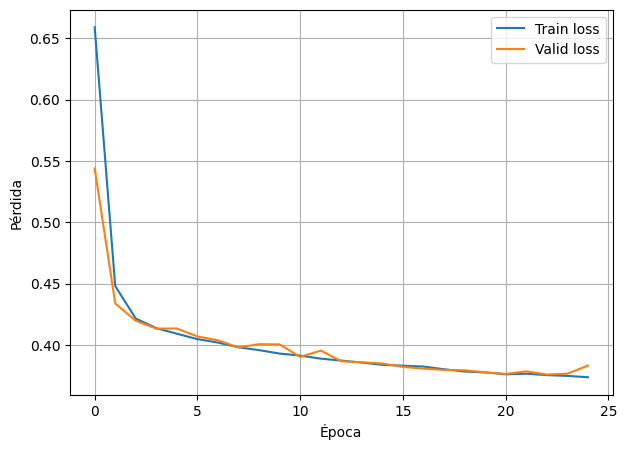

C:\Users\sevas\AppData\Local\Temp\ipykernel_17324\2642999833.py:340: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("best_model_struct.pt", m

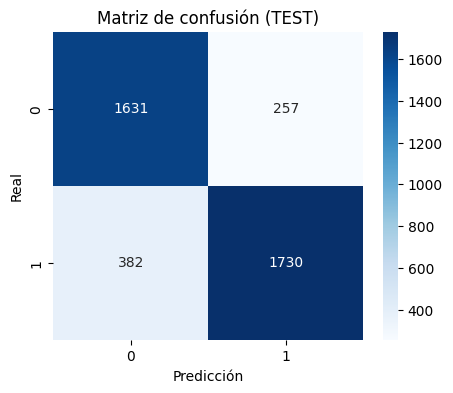

Accuracy: 0.84025

              precision    recall  f1-score   support

           0     0.8102    0.8639    0.8362      1888
           1     0.8707    0.8191    0.8441      2112

    accuracy                         0.8403      4000
   macro avg     0.8404    0.8415    0.8402      4000
weighted avg     0.8421    0.8403    0.8404      4000



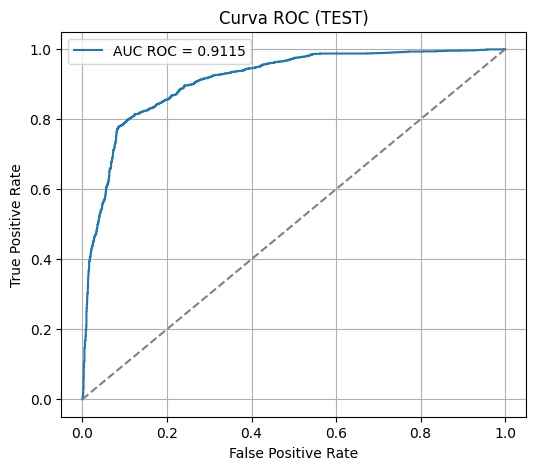

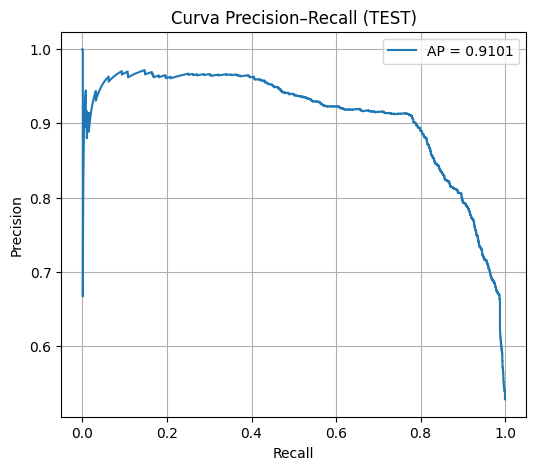

Nuevos pacientes: 5000
Predichos clase 1: 2472
Predichos clase 0: 2528
Probabilidad media clase 1: 0.54421794


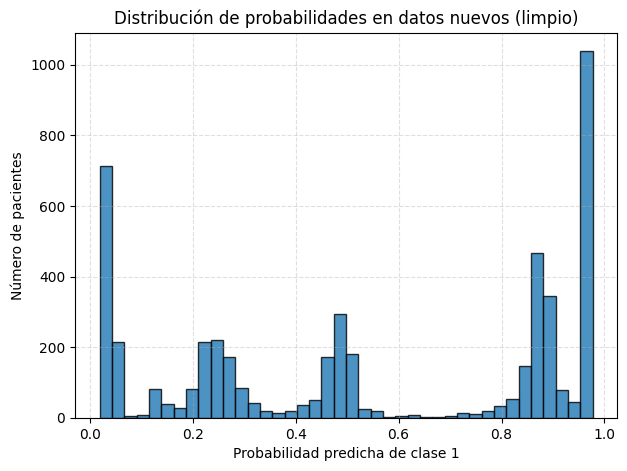

Archivo 'onc_fresh_con_predicciones_struct.csv' guardado.


In [11]:
# ============================================================
# 0. IMPORTS Y DISPOSITIVO
# ============================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import (
    confusion_matrix, classification_report,
    roc_curve, roc_auc_score, accuracy_score,
    precision_recall_curve, average_precision_score
)

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Usando dispositivo:", device)


df = pd.read_csv('onc_train_full_with_target.csv')

df = df.drop(columns=['estadio_ajcc','ecog','mut_kras','receptor_hormonal','programa_prevencion'
 ,'respuesta_previa','mut_braf','biopsia_tipo','metastasis','cuidados_paliativos'
 ,'t_invasivo','sexo','n_linfatico','aseguradora','tmb_alto','comite_tumores','psicooncologia',
 'mut_egfr','mut_pi3k'])

X = df.drop('vive', axis=1)
y = df['vive']

# divide X en numericas y categoricas creando dos dataframes
X_num = X.select_dtypes(include=['int64', 'float64'])

X_cat = X.select_dtypes(include=['object', 'category'])


# ============================================================
# 1. SEPARAR TRAIN / VALID / TEST A PARTIR DE X_num, X_cat, y
# ============================================================

# Unimos numéricas + categóricas
X_full = pd.concat([X_num, X_cat], axis=1)

num_cols = X_num.columns.tolist()
cat_cols = X_cat.columns.tolist()

X_train, X_temp, y_train, y_temp = train_test_split(
    X_full, y, test_size=0.2, random_state=42, stratify=y
)

X_valid, X_test, y_valid, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print("Shapes ->",
      "Train:", X_train.shape,
      "Valid:", X_valid.shape,
      "Test:",  X_test.shape)

# ============================================================
# 2. IMPUTACIÓN DE NUMÉRICAS + COLUMNAS _missing
# ============================================================

X_train_num = X_train[num_cols].copy()
X_valid_num = X_valid[num_cols].copy()
X_test_num  = X_test[num_cols].copy()

# Medianas SOLO en train
num_medians = X_train_num.median()

for col in num_cols:
    # flags de missing
    X_train_num[col + "_missing"] = X_train_num[col].isna().astype(int)
    X_valid_num[col + "_missing"] = X_valid_num[col].isna().astype(int)
    X_test_num[col  + "_missing"] = X_test_num[col].isna().astype(int)

    # imputación con mediana de TRAIN
    X_train_num[col] = X_train_num[col].fillna(num_medians[col])
    X_valid_num[col] = X_valid_num[col].fillna(num_medians[col])
    X_test_num[col]  = X_test_num[col].fillna(num_medians[col])

# columnas numéricas extendidas (valores + flags)
num_cols_extended = X_train_num.columns.tolist()

# ============================================================
# 3. CATEGÓRICAS: IMPUTACIÓN "MISSING" + LABEL ENCODER
# ============================================================

X_train_cat = X_train[cat_cols].copy()
X_valid_cat = X_valid[cat_cols].copy()
X_test_cat  = X_test[cat_cols].copy()

X_train_cat = X_train_cat.fillna("MISSING")
X_valid_cat = X_valid_cat.fillna("MISSING")
X_test_cat  = X_test_cat.fillna("MISSING")

label_encoders = {}

for col in cat_cols:
    enc = LabelEncoder()
    X_train_cat[col] = enc.fit_transform(X_train_cat[col].astype(str))

    known = set(enc.classes_)
    X_valid_cat[col] = (
        X_valid_cat[col]
        .astype(str)
        .where(X_valid_cat[col].astype(str).isin(known), other="MISSING")
    )
    X_test_cat[col] = (
        X_test_cat[col]
        .astype(str)
        .where(X_test_cat[col].astype(str).isin(known), other="MISSING")
    )

    X_valid_cat[col] = enc.transform(X_valid_cat[col].astype(str))
    X_test_cat[col]  = enc.transform(X_test_cat[col].astype(str))

    label_encoders[col] = enc

# ============================================================
# 4. NORMALIZACIÓN (Min-Max) DE NUMÉRICAS (NO flags *_missing)
# ============================================================

original_num_cols = num_cols                        # solo valores reales
missing_flag_cols = [c for c in num_cols_extended if c.endswith("_missing")]

scaler = MinMaxScaler(feature_range=(0.0, 1.0))
scaler.fit(X_train_num[original_num_cols].values.astype("float32"))

X_train_num_scaled_values = scaler.transform(X_train_num[original_num_cols].values.astype("float32"))
X_valid_num_scaled_values = scaler.transform(X_valid_num[original_num_cols].values.astype("float32"))
X_test_num_scaled_values  = scaler.transform(X_test_num[original_num_cols].values.astype("float32"))

X_train_num_scaled = pd.DataFrame(
    X_train_num_scaled_values,
    columns=original_num_cols,
    index=X_train_num.index
)
X_valid_num_scaled = pd.DataFrame(
    X_valid_num_scaled_values,
    columns=original_num_cols,
    index=X_valid_num.index
)
X_test_num_scaled = pd.DataFrame(
    X_test_num_scaled_values,
    columns=original_num_cols,
    index=X_test_num.index
)

# añadimos flags *_missing sin escalar
for col in missing_flag_cols:
    X_train_num_scaled[col] = X_train_num[col].values
    X_valid_num_scaled[col] = X_valid_num[col].values
    X_test_num_scaled[col]  = X_test_num[col].values

# ============================================================
# 5. MATRICES FINALES DE FEATURES (NUM + CAT)
# ============================================================

X_train_all = np.hstack([
    X_train_num_scaled.values.astype("float32"),
    X_train_cat.values.astype("float32")
])

X_valid_all = np.hstack([
    X_valid_num_scaled.values.astype("float32"),
    X_valid_cat.values.astype("float32")
])

X_test_all = np.hstack([
    X_test_num_scaled.values.astype("float32"),
    X_test_cat.values.astype("float32")
])

print("Feature dims ->", X_train_all.shape[1], "features totales")

# ============================================================
# 6. TENSORES Y DATALOADERS
# ============================================================

X_train_tensor = torch.from_numpy(X_train_all).float()
y_train_tensor = torch.from_numpy(np.array(y_train).astype("float32")).unsqueeze(1)

X_valid_tensor = torch.from_numpy(X_valid_all).float()
y_valid_tensor = torch.from_numpy(np.array(y_valid).astype("float32")).unsqueeze(1)

X_test_tensor = torch.from_numpy(X_test_all).float()
y_test_tensor = torch.from_numpy(np.array(y_test).astype("float32")).unsqueeze(1)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
valid_dataset = TensorDataset(X_valid_tensor, y_valid_tensor)
test_dataset  = TensorDataset(X_test_tensor,  y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=256, shuffle=False)
test_loader  = DataLoader(test_dataset,  batch_size=256, shuffle=False)

# ============================================================
# 7. DEFINIR OPCIONES DE CAPAS Y MODELO MLP FLEXIBLE
# ============================================================

layers_options = [
    [16, 32],       
    [32, 64],       
    [16, 16, 32],   
    [64, 32, 16],   
    [128, 64, 32, 16], 
    [256, 128, 64, 32, 16],
    [512, 256, 128, 64, 32, 16],
    [512,256,125,64,64,32,16],
    [512,256,125,64,64,64,32,16],
    [512,256,125,64,64,64,32,16,16]
]

hidden_sizes = layers_options[8]   # aquí escoges la estructura que quieras

class CancerMLP(nn.Module):
    """
    MLP genérico:
      - Primera capa oculta: activación arctan
      - Capas ocultas intermedias: ReLU
      - Capa de salida: 1 neurona + Sigmoid
    """
    def __init__(self, n_features: int, hidden_sizes):
        super().__init__()
        
        self.hidden_layers = nn.ModuleList()
        in_features = n_features
        
        for h in hidden_sizes:
            self.hidden_layers.append(nn.Linear(in_features, h))
            in_features = h
        
        self.out = nn.Linear(in_features, 1)
    
    def forward(self, x):
        for i, layer in enumerate(self.hidden_layers):
            x = layer(x)
            if i == 0:
                x = torch.atan(x)     # Primera capa oculta -> arctan
            else:
                x = torch.relu(x)     # Capas ocultas intermedias -> ReLU
        
        x = self.out(x)
        x = torch.sigmoid(x)          # salida en [0,1]
        return x

n_features = X_train_all.shape[1]
model = CancerMLP(n_features, hidden_sizes).to(device)

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-4)

# ============================================================
# 8. FUNCIONES DE TRAIN / EVAL
# ============================================================

def train_one_epoch():
    model.train()
    running_loss = 0.0
    for batchx, batchy in train_loader:
        batchx = batchx.to(device)
        batchy = batchy.to(device)  # [batch,1] float

        optimizer.zero_grad()
        outputs = model(batchx)     # [batch,1] probas
        loss = criterion(outputs, batchy)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    return running_loss / len(train_loader)


def eval_one_epoch(loader):
    model.eval()
    running_loss = 0.0
    with torch.no_grad():
        for batchx, batchy in loader:
            batchx = batchx.to(device)
            batchy = batchy.to(device)

            outputs = model(batchx)
            loss = criterion(outputs, batchy)
            running_loss += loss.item()
    return running_loss / len(loader)

# ============================================================
# 9. ENTRENAMIENTO CON EARLY STOPPING
# ============================================================

num_epochs = 25
history_train = []
history_valid = []

best_valid_loss = float("inf")
patience = 10
no_improve_epochs = 0

for epoch in range(1, num_epochs + 1):
    train_loss = train_one_epoch()
    valid_loss = eval_one_epoch(valid_loader)

    history_train.append(train_loss)
    history_valid.append(valid_loss)

    if valid_loss < best_valid_loss - 1e-4:
        best_valid_loss = valid_loss
        no_improve_epochs = 0
        torch.save(model.state_dict(), "best_model_struct.pt")
        print(f"[Época {epoch:3d}] Nuevo mejor modelo guardado. valid_loss = {valid_loss:.4f}")
    else:
        no_improve_epochs += 1
        print(f"[Época {epoch:3d}] Sin mejora ({no_improve_epochs}/{patience})")

    print(f"           train_loss = {train_loss:.4f} | valid_loss = {valid_loss:.4f}")

    if no_improve_epochs >= patience:
        print("\n⛔ Early stopping activado.")
        break

plt.figure(figsize=(7,5))
plt.plot(history_train, label="Train loss")
plt.plot(history_valid, label="Valid loss")
plt.xlabel("Época")
plt.ylabel("Pérdida")
plt.legend()
plt.grid(True)
plt.show()

# ============================================================
# 10. EVALUACIÓN EN TEST (MATRIZ, ROC, PR)
# ============================================================

model.load_state_dict(torch.load("best_model_struct.pt", map_location=device))
model.to(device)
model.eval()

all_labels = []
all_preds = []
all_probs = []

with torch.no_grad():
    for x_batch, y_batch in test_loader:
        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device)

        probs = model(x_batch).squeeze(1)           # [batch] probas
        preds = (probs >= 0.5).long()

        all_labels.extend(y_batch.cpu().numpy().astype(int).ravel())
        all_preds.extend(preds.cpu().numpy().astype(int))
        all_probs.extend(probs.cpu().numpy())

all_labels = np.array(all_labels)
all_preds  = np.array(all_preds)
all_probs  = np.array(all_probs)

cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de confusión (TEST)")
plt.show()

print("Accuracy:", accuracy_score(all_labels, all_preds))
print()
print(classification_report(all_labels, all_preds, digits=4))

fpr, tpr, _ = roc_curve(all_labels, all_probs)
auc_roc = roc_auc_score(all_labels, all_probs)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC ROC = {auc_roc:.4f}")
plt.plot([0,1], [0,1], "--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC (TEST)")
plt.legend()
plt.grid(True)
plt.show()

precision, recall, _ = precision_recall_curve(all_labels, all_probs)
ap = average_precision_score(all_labels, all_probs)
plt.figure(figsize=(6,5))
plt.plot(recall, precision, label=f"AP = {ap:.4f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Curva Precision–Recall (TEST)")
plt.grid(True)
plt.legend()
plt.show()

# ============================================================
# 11. PREDICCIÓN EN DATOS NUEVOS (limpio) + HISTOGRAMA
# ============================================================

limpio = pd.read_csv("onc_fresh_full_no_target.csv")
df_new = limpio.copy()

# --- NUMÉRICAS ---
df_new_num = df_new[num_cols].copy()

for col in num_cols:
    df_new_num[col + "_missing"] = df_new_num[col].isna().astype(int)
    df_new_num[col] = df_new_num[col].fillna(num_medians[col])

# Escalar columnas numéricas originales con el mismo scaler
new_num_scaled_vals = scaler.transform(
    df_new_num[original_num_cols].values.astype("float32")
)

df_new_num_scaled = pd.DataFrame(
    new_num_scaled_vals,
    columns=original_num_cols,
    index=df_new_num.index
)

# añadir flags *_missing
for col in missing_flag_cols:
    df_new_num_scaled[col] = df_new_num[col].values

# --- CATEGÓRICAS ---
df_new_cat = df_new[cat_cols].copy().fillna("MISSING")

for col in cat_cols:
    enc = label_encoders[col]
    known = set(enc.classes_)
    df_new_cat[col] = (
        df_new_cat[col]
        .astype(str)
        .where(df_new_cat[col].astype(str).isin(known), other="MISSING")
    )
    df_new_cat[col] = enc.transform(df_new_cat[col].astype(str))

# --- UNIR NUM + CAT ---
X_new_all = np.hstack([
    df_new_num_scaled.values.astype("float32"),
    df_new_cat.values.astype("float32")
])

X_new_tensor = torch.from_numpy(X_new_all).float().to(device)

model.eval()
with torch.no_grad():
    probs_new = model(X_new_tensor).squeeze(1).cpu().numpy()
    preds_new = (probs_new >= 0.5).astype(int)

print("Nuevos pacientes:", len(probs_new))
print("Predichos clase 1:", (preds_new == 1).sum())
print("Predichos clase 0:", (preds_new == 0).sum())
print("Probabilidad media clase 1:", probs_new.mean())

plt.figure(figsize=(7,5))
plt.hist(probs_new, bins=40, edgecolor="black", alpha=0.8)
plt.xlabel("Probabilidad predicha de clase 1")
plt.ylabel("Número de pacientes")
plt.title("Distribución de probabilidades en datos nuevos (limpio)")
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()

salida = limpio.copy()
salida["prob_clase_1"] = probs_new
salida["pred_clase"] = preds_new
salida.to_csv("onc_fresh_con_predicciones_struct.csv", index=False)
print("Archivo 'onc_fresh_con_predicciones_struct.csv' guardado.")


# cargar modelo para la app

In [12]:
import joblib
import torch

# 1) Guardar el modelo
torch.save(model.state_dict(), "best_model.pt")

# 2) Guardar objetos de preprocesado
joblib.dump(scaler, "scaler.pkl")
joblib.dump(num_medians, "num_medians.pkl")
joblib.dump(original_num_cols, "original_num_cols.pkl")
joblib.dump(missing_flag_cols, "missing_flag_cols.pkl")
joblib.dump(cat_cols, "cat_cols.pkl")
joblib.dump(label_encoders, "label_encoders.pkl")


['label_encoders.pkl']

# comprobacion que habia que modificar la app(ya esta modificada)

In [8]:
# --- ya tienes esto hecho ---
# limpio = pd.read_csv("onc_fresh_full_no_target.csv")
# ...
# probs_new = model(X_new_tensor).squeeze(1).cpu().numpy()
limpio = pd.read_csv("onc_fresh_full_no_target.csv")

salida = limpio.copy()
salida["prob_clase_1"] = probs_new
salida["pred_clase"] = (probs_new >= 0.5).astype(int)

# 1) Pacientes con probabilidad prácticamente 100% de vivir
#    (ajusta el umbral si quieres ser más o menos estricto)
umbral = 0.9
pacientes_prob_100 = salida[salida["prob_clase_1"] >= umbral]

print(f"Número de pacientes con prob_clase_1 ≥ {umbral}:",
      len(pacientes_prob_100))

# Mostrar algunas filas
print(pacientes_prob_100.head())

# 2) Si quieres guardarlos en un CSV aparte:
pacientes_prob_100.to_csv("pacientes_prob_vivir_100.csv", index=False)
print("Archivo 'pacientes_prob_vivir_100.csv' guardado.")


Número de pacientes con prob_clase_1 ≥ 0.9: 1220
   edad        imc  dias_desde_diagnostico  sesiones_quimio  hemoglobina  \
0  51.0  29.064501                    64.0             15.0    15.740009   
3  86.0  33.065679                   367.0              9.0    15.000083   
5  60.0  30.000657                   356.0              6.0    14.451731   
7  55.0  24.575218                   259.0              6.0    11.172536   
9  52.0  28.718799                    84.0              6.0    16.004204   

   hematocrito  eritrocitos  leucocitos  neutrofilos  linfocitos  ...  \
0    35.586649     5.381777    9.178896     4.089528    2.556299  ...   
3    42.933074     4.630612    9.611905     4.681211    3.191826  ...   
5    42.384960     4.617513    6.986996     2.956511    2.389701  ...   
7    46.143943     4.682242   10.146997     4.702444    2.432196  ...   
9    42.902608     4.661691    9.486940     1.589497    2.484123  ...   

   centro_sanitario  cohorte_estudio  variabilidad_labo

In [12]:
FEATURES_NUM = [
    "edad",
    "glucosa",
    "urea",
    "proteinas_totales",
    "fosforo",
    "eosinofilos",
    "leucocitos",
    "hemoglobina",
    "plaquetas",
    "albumina",
]
FEATURES_CAT = [
    "tipo_tumor",
    "tratamiento_actual",
    "region",
    "hospital_tipo",
    "nivel_estres",
    "habito_tabaco",
    "actividad_fisica",
    "centro_sanitario",
    "cohorte_estudio",
    "variabilidad_laboratorio",
]


In [13]:
cols_app = FEATURES_NUM + FEATURES_CAT

# Ver las primeras filas solo con las columnas de la app
print(pacientes_prob_100[cols_app].head())

# Si quieres un paciente concreto (por ejemplo el índice 0):
i = 0
print("Paciente", i)
print(pacientes_prob_100.loc[i, cols_app])


   edad     glucosa       urea  proteinas_totales   fosforo  eosinofilos  \
0  51.0  113.840211  47.448161           7.968268  4.559389     0.308148   
3  86.0  134.450589  39.179264           7.510488  4.003743     0.086768   
5  60.0   94.770056  43.351325           8.171704  4.104536     0.057785   
7  55.0  125.162874  38.575018           7.207569  2.881383     0.269219   
9  52.0  113.064634  36.345351           7.403768  3.938598     0.243567   

   leucocitos  hemoglobina   plaquetas  albumina tipo_tumor  \
0    9.178896    15.740009  232.692611  3.698122       mama   
3    9.611905    15.000083  216.735533  4.094604       mama   
5    6.986996    14.451731  365.293770  3.766950     pulmon   
7   10.146997    11.172536  283.508224  4.412918     pulmon   
9    9.486940    16.004204  225.279628  4.310517     pulmon   

  tratamiento_actual  region hospital_tipo nivel_estres habito_tabaco  \
0      quimioterapia  centro     terciario         bajo         nunca   
3      quimioterap

In [14]:
# Supongo que ya tienes estos cargados igual que en la app:
# scaler, num_medians, original_num_cols, missing_flag_cols, cat_cols, label_encoders, model

FEATURES_NUM = [
    "edad","glucosa","urea","proteinas_totales","fosforo",
    "eosinofilos","leucocitos","hemoglobina","plaquetas","albumina",
]

FEATURES_CAT = [
    "tipo_tumor","tratamiento_actual","region","hospital_tipo","nivel_estres",
    "habito_tabaco","actividad_fisica","centro_sanitario","cohorte_estudio",
    "variabilidad_laboratorio",
]

def preprocess_and_predict_like_app(fila):
    input_dict = {}
    for col in FEATURES_NUM:
        input_dict[col] = fila[col]
    for col in FEATURES_CAT:
        input_dict[col] = fila[col]

    # ==== COPIA EXACTA DE preprocess_and_predict de la app ====
    df_num = pd.DataFrame(columns=original_num_cols)
    df_cat = pd.DataFrame(columns=cat_cols)

    df_num.loc[0] = np.nan
    df_cat.loc[0] = "MISSING"

    for col, val in input_dict.items():
        if col in original_num_cols:
            df_num.at[0, col] = float(val) if val is not None else np.nan
        elif col in cat_cols:
            df_cat.at[0, col] = str(val) if val not in [None, ""] else "MISSING"

    for col in original_num_cols:
        missing_col = col + "_missing"
        df_num[missing_col] = df_num[col].isna().astype(int)
        df_num[col] = df_num[col].fillna(num_medians[col])

    flag_cols = [c for c in df_num.columns if c.endswith("_missing")]

    num_scaled = scaler.transform(df_num[original_num_cols].values.astype("float32"))
    df_num_scaled = pd.DataFrame(num_scaled, columns=original_num_cols)
    for col in flag_cols:
        df_num_scaled[col] = df_num[col].values

    for col in cat_cols:
        enc = label_encoders[col]
        known = set(enc.classes_)
        val = df_cat.at[0, col]
        if val not in known:
            val = "MISSING"
        df_cat.at[0, col] = val
        df_cat[col] = enc.transform(df_cat[col].astype(str))

    X_all = np.hstack([
        df_num_scaled.values.astype("float32"),
        df_cat.values.astype("float32")
    ])

    x_tensor = torch.from_numpy(X_all).float().to(device)

    model.eval()
    with torch.no_grad():
        prob = model(x_tensor).squeeze(1).cpu().numpy()[0]

    return prob

# Ejemplo con paciente 0
fila = pacientes_prob_100.iloc[0]
prob_app_like = preprocess_and_predict_like_app(fila)
print("Probabilidad tipo APP:", prob_app_like)


Probabilidad tipo APP: 0.22279988


# cambios de la red segun distintas estructuras

Usando dispositivo: cuda
Shapes -> Train: (32000, 73) Valid: (4000, 73) Test: (4000, 73)
Feature dims -> 119 features totales

=== Entrenando arquitectura 1/10: [16, 32] ===
Accuracy test (modelo 1): 0.8760

=== Entrenando arquitectura 2/10: [32, 64] ===
Accuracy test (modelo 2): 0.8775

=== Entrenando arquitectura 3/10: [16, 16, 32] ===
Accuracy test (modelo 3): 0.8770

=== Entrenando arquitectura 4/10: [64, 32, 16] ===
Accuracy test (modelo 4): 0.8780

=== Entrenando arquitectura 5/10: [128, 64, 32, 16] ===
Accuracy test (modelo 5): 0.8775

=== Entrenando arquitectura 6/10: [256, 128, 64, 32, 16] ===
Accuracy test (modelo 6): 0.8782

=== Entrenando arquitectura 7/10: [512, 256, 128, 64, 32, 16] ===
Accuracy test (modelo 7): 0.8785

=== Entrenando arquitectura 8/10: [512, 256, 125, 64, 64, 32, 16] ===
Accuracy test (modelo 8): 0.8755

=== Entrenando arquitectura 9/10: [512, 256, 125, 64, 64, 64, 32, 16] ===
Accuracy test (modelo 9): 0.8780

=== Entrenando arquitectura 10/10: [512, 256

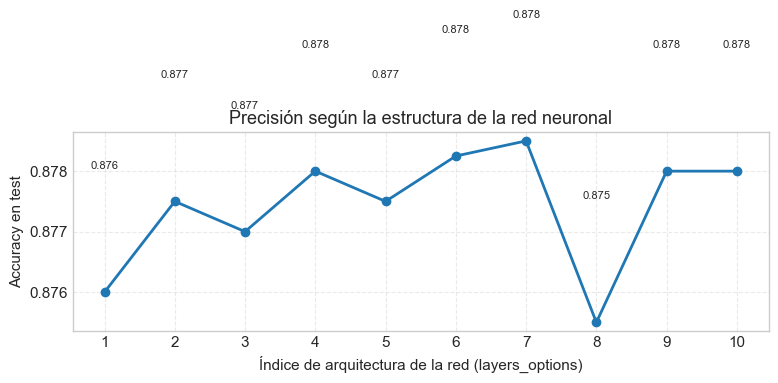

In [68]:
# ============================================================
# 0. IMPORTS Y DISPOSITIVO
# ============================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import accuracy_score

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Usando dispositivo:", device)

# ============================================================
# 1. CARGA DE DATOS Y SEPARACIÓN NUM / CAT
# ============================================================

df = pd.read_csv('onc_train_full_with_target.csv')

# Quitamos las variables "trampa"
df = df.drop(columns=[
    'mut_kras','receptor_hormonal','programa_prevencion',
    'respuesta_previa','mut_braf','biopsia_tipo','metastasis','cuidados_paliativos',
    't_invasivo','sexo','n_linfatico','aseguradora','tmb_alto','comite_tumores',
    'psicooncologia','mut_egfr','mut_pi3k'
])

X = df.drop('vive', axis=1)
y = df['vive']

# divide X en numericas y categoricas creando dos dataframes
X_num = X.select_dtypes(include=['int64', 'float64'])
X_cat = X.select_dtypes(include=['object', 'category'])

# ============================================================
# 2. SEPARAR TRAIN / VALID / TEST A PARTIR DE X_num, X_cat, y
# ============================================================

# Unimos numéricas + categóricas
X_full = pd.concat([X_num, X_cat], axis=1)

num_cols = X_num.columns.tolist()
cat_cols = X_cat.columns.tolist()

X_train, X_temp, y_train, y_temp = train_test_split(
    X_full, y, test_size=0.2, random_state=42, stratify=y
)

X_valid, X_test, y_valid, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print("Shapes ->",
      "Train:", X_train.shape,
      "Valid:", X_valid.shape,
      "Test:",  X_test.shape)

# ============================================================
# 3. IMPUTACIÓN DE NUMÉRICAS + COLUMNAS _missing
# ============================================================

X_train_num = X_train[num_cols].copy()
X_valid_num = X_valid[num_cols].copy()
X_test_num  = X_test[num_cols].copy()

# Medianas SOLO en train
num_medians = X_train_num.median()

for col in num_cols:
    # flags de missing
    X_train_num[col + "_missing"] = X_train_num[col].isna().astype(int)
    X_valid_num[col + "_missing"] = X_valid_num[col].isna().astype(int)
    X_test_num[col  + "_missing"] = X_test_num[col].isna().astype(int)

    # imputación con mediana de TRAIN
    X_train_num[col] = X_train_num[col].fillna(num_medians[col])
    X_valid_num[col] = X_valid_num[col].fillna(num_medians[col])
    X_test_num[col]  = X_test_num[col].fillna(num_medians[col])

# columnas numéricas extendidas (valores + flags)
num_cols_extended = X_train_num.columns.tolist()

# ============================================================
# 4. CATEGÓRICAS: IMPUTACIÓN "MISSING" + LABEL ENCODER
# ============================================================

X_train_cat = X_train[cat_cols].copy()
X_valid_cat = X_valid[cat_cols].copy()
X_test_cat  = X_test[cat_cols].copy()

X_train_cat = X_train_cat.fillna("MISSING")
X_valid_cat = X_valid_cat.fillna("MISSING")
X_test_cat  = X_test_cat.fillna("MISSING")

label_encoders = {}

for col in cat_cols:
    enc = LabelEncoder()
    X_train_cat[col] = enc.fit_transform(X_train_cat[col].astype(str))

    known = set(enc.classes_)
    X_valid_cat[col] = (
        X_valid_cat[col]
        .astype(str)
        .where(X_valid_cat[col].astype(str).isin(known), other="MISSING")
    )
    X_test_cat[col] = (
        X_test_cat[col]
        .astype(str)
        .where(X_test_cat[col].astype(str).isin(known), other="MISSING")
    )

    X_valid_cat[col] = enc.transform(X_valid_cat[col].astype(str))
    X_test_cat[col]  = enc.transform(X_test_cat[col].astype(str))

    label_encoders[col] = enc

# ============================================================
# 5. NORMALIZACIÓN (Min-Max) DE NUMÉRICAS (NO flags *_missing)
# ============================================================

original_num_cols = num_cols                        # solo valores reales
missing_flag_cols = [c for c in num_cols_extended if c.endswith("_missing")]

scaler = MinMaxScaler(feature_range=(0.0, 1.0))
scaler.fit(X_train_num[original_num_cols].values.astype("float32"))

X_train_num_scaled_values = scaler.transform(X_train_num[original_num_cols].values.astype("float32"))
X_valid_num_scaled_values = scaler.transform(X_valid_num[original_num_cols].values.astype("float32"))
X_test_num_scaled_values  = scaler.transform(X_test_num[original_num_cols].values.astype("float32"))

X_train_num_scaled = pd.DataFrame(
    X_train_num_scaled_values,
    columns=original_num_cols,
    index=X_train_num.index
)
X_valid_num_scaled = pd.DataFrame(
    X_valid_num_scaled_values,
    columns=original_num_cols,
    index=X_valid_num.index
)
X_test_num_scaled = pd.DataFrame(
    X_test_num_scaled_values,
    columns=original_num_cols,
    index=X_test_num.index
)

# añadimos flags *_missing sin escalar
for col in missing_flag_cols:
    X_train_num_scaled[col] = X_train_num[col].values
    X_valid_num_scaled[col] = X_valid_num[col].values
    X_test_num_scaled[col]  = X_test_num[col].values

# ============================================================
# 6. MATRICES FINALES DE FEATURES (NUM + CAT)
# ============================================================

X_train_all = np.hstack([
    X_train_num_scaled.values.astype("float32"),
    X_train_cat.values.astype("float32")
])

X_valid_all = np.hstack([
    X_valid_num_scaled.values.astype("float32"),
    X_valid_cat.values.astype("float32")
])

X_test_all = np.hstack([
    X_test_num_scaled.values.astype("float32"),
    X_test_cat.values.astype("float32")
])

print("Feature dims ->", X_train_all.shape[1], "features totales")

# ============================================================
# 7. TENSORES Y DATALOADERS
# ============================================================

X_train_tensor = torch.from_numpy(X_train_all).float()
y_train_tensor = torch.from_numpy(np.array(y_train).astype("float32")).unsqueeze(1)

X_valid_tensor = torch.from_numpy(X_valid_all).float()
y_valid_tensor = torch.from_numpy(np.array(y_valid).astype("float32")).unsqueeze(1)

X_test_tensor = torch.from_numpy(X_test_all).float()
y_test_tensor = torch.from_numpy(np.array(y_test).astype("float32")).unsqueeze(1)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
valid_dataset = TensorDataset(X_valid_tensor, y_valid_tensor)
test_dataset  = TensorDataset(X_test_tensor,  y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=256, shuffle=False)
test_loader  = DataLoader(test_dataset,  batch_size=256, shuffle=False)

# ============================================================
# 8. OPCIONES DE CAPAS (ARQUITECTURAS A PROBAR)
# ============================================================

layers_options = [
    [16, 32],
    [32, 64],
    [16, 16, 32],
    [64, 32, 16],
    [128, 64, 32, 16],
    [256, 128, 64, 32, 16],
    [512, 256, 128, 64, 32, 16],
    [512, 256, 125, 64, 64, 32, 16],
    [512, 256, 125, 64, 64, 64, 32, 16],
    [512, 256, 125, 64, 64, 64, 32, 16, 16]
]

# ============================================================
# 9. DEFINICIÓN DEL MODELO MLP FLEXIBLE
# ============================================================

class CancerMLP(nn.Module):
    """
    MLP genérico:
      - Primera capa oculta: activación arctan
      - Capas ocultas intermedias: ReLU
      - Capa de salida: 1 neurona + Sigmoid
    """
    def __init__(self, n_features: int, hidden_sizes):
        super().__init__()
        
        self.hidden_layers = nn.ModuleList()
        in_features = n_features
        
        for h in hidden_sizes:
            self.hidden_layers.append(nn.Linear(in_features, h))
            in_features = h
        
        self.out = nn.Linear(in_features, 1)
    
    def forward(self, x):
        for i, layer in enumerate(self.hidden_layers):
            x = layer(x)
            if i == 0:
                x = torch.atan(x)     # Primera capa oculta -> arctan
            else:
                x = torch.relu(x)     # Capas ocultas intermedias -> ReLU
        
        x = self.out(x)
        x = torch.sigmoid(x)          # salida en [0,1]
        return x

n_features = X_train_all.shape[1]

# ============================================================
# 10. FUNCIÓN PARA ENTRENAR Y EVALUAR UNA ARQUITECTURA
# ============================================================

def train_and_eval_arch(hidden_sizes, num_epochs=25, lr=1e-4, wd=1e-4):
    model = CancerMLP(n_features, hidden_sizes).to(device)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=wd)

    best_valid = float("inf")
    best_state = None
    patience = 5
    no_improve = 0

    # entrenamiento con early stopping sencillo
    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        for xb, yb in train_loader:
            xb = xb.to(device)
            yb = yb.to(device)
            optimizer.zero_grad()
            out = model(xb)
            loss = criterion(out, yb)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        train_loss /= len(train_loader)

        model.eval()
        valid_loss = 0.0
        with torch.no_grad():
            for xb, yb in valid_loader:
                xb = xb.to(device)
                yb = yb.to(device)
                out = model(xb)
                loss = criterion(out, yb)
                valid_loss += loss.item()
        valid_loss /= len(valid_loader)

        if valid_loss < best_valid - 1e-4:
            best_valid = valid_loss
            best_state = model.state_dict()
            no_improve = 0
        else:
            no_improve += 1
            if no_improve >= patience:
                break

    # cargamos el mejor modelo encontrado en valid
    if best_state is not None:
        model.load_state_dict(best_state)
    model.eval()

    # evaluación en TEST (accuracy)
    all_labels = []
    all_preds = []
    with torch.no_grad():
        for xb, yb in test_loader:
            xb = xb.to(device)
            yb = yb.to(device)
            probs = model(xb).squeeze(1)
            preds = (probs >= 0.5).long()
            all_labels.extend(yb.cpu().numpy().astype(int).ravel())
            all_preds.extend(preds.cpu().numpy().astype(int))

    acc = accuracy_score(all_labels, np.array(all_preds))
    return acc

# ============================================================
# 11. PROBAR TODAS LAS ARQUITECTURAS Y GUARDAR ACCURACY
# ============================================================

results_arch = []
for i, h_sizes in enumerate(layers_options):
    print(f"\n=== Entrenando arquitectura {i+1}/{len(layers_options)}: {h_sizes} ===")
    acc_i = train_and_eval_arch(h_sizes)
    results_arch.append({
        "modelo": i + 1,
        "hidden_sizes": str(h_sizes),
        "accuracy_test": acc_i
    })
    print(f"Accuracy test (modelo {i+1}): {acc_i:.4f}")

results_arch_df = pd.DataFrame(results_arch)
print("\nResumen por arquitectura:")
print(results_arch_df)

# ============================================================
# 12. GRÁFICA: ESTRUCTURA vs ACCURACY EN TEST
# ============================================================

plt.figure(figsize=(8,5))
plt.plot(
    results_arch_df["modelo"],
    results_arch_df["accuracy_test"],
    marker="o",
    linewidth=2
)

for x, y in zip(results_arch_df["modelo"], results_arch_df["accuracy_test"]):
    plt.text(x, y + 0.002, f"{y:.3f}", ha="center", va="bottom", fontsize=8)

plt.xticks(results_arch_df["modelo"])
plt.xlabel("Índice de arquitectura de la red (layers_options)")
plt.ylabel("Accuracy en test")
plt.title("Precisión según la estructura de la red neuronal")
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()


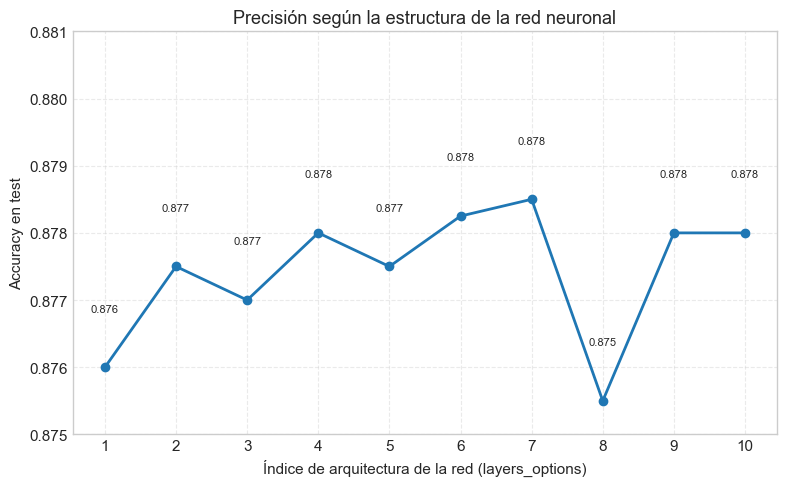

In [69]:
plt.figure(figsize=(8,5))
plt.plot(
    results_arch_df["modelo"],
    results_arch_df["accuracy_test"],
    marker="o",
    linewidth=2
)

# Ajustar límites del eje Y para que quepan las etiquetas
y_min = results_arch_df["accuracy_test"].min() - 0.0005
y_max = results_arch_df["accuracy_test"].max() + 0.0025  # un poco por encima
plt.ylim(y_min, y_max)

for x, y in zip(results_arch_df["modelo"], results_arch_df["accuracy_test"]):
    plt.text(x, y + 0.0008, f"{y:.3f}", ha="center", va="bottom", fontsize=8)

plt.xticks(results_arch_df["modelo"])
plt.xlabel("Índice de arquitectura de la red (layers_options)")
plt.ylabel("Accuracy en test")
plt.title("Precisión según la estructura de la red neuronal")
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()


# diseños red


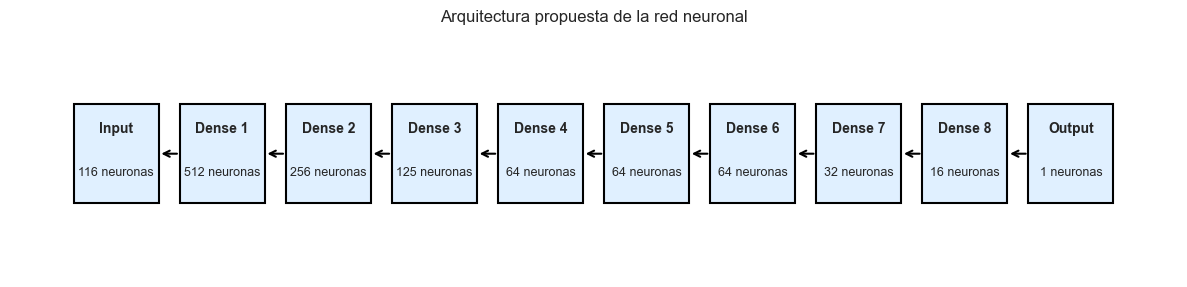

In [83]:
import matplotlib.pyplot as plt

# Definimos la arquitectura
layers = [
    ("Input", 116),
    ("Dense 1", 512),
    ("Dense 2", 256),
    ("Dense 3", 125),
    ("Dense 4", 64),
    ("Dense 5", 64),
    ("Dense 6", 64),
    ("Dense 7", 32),
    ("Dense 8", 16),
    ("Output", 1),
]

# Parámetros visuales
fig, ax = plt.subplots(figsize=(12, 3))
ax.set_xlim(0, len(layers) + 1)
ax.set_ylim(0, 1)
ax.axis("off")

box_width = 0.8
box_height = 0.4

for i, (name, units) in enumerate(layers):
    x_center = i + 1
    y_center = 0.5
    
    # Dibujar la caja
    rect = plt.Rectangle(
        (x_center - box_width/2, y_center - box_height/2),
        box_width,
        box_height,
        edgecolor="black",
        facecolor="#e0f0ff",
        linewidth=1.5
    )
    ax.add_patch(rect)
    
    # Nombre de la capa
    ax.text(
        x_center, y_center + 0.10,
        name,
        ha="center", va="center",
        fontsize=10, fontweight="bold"
    )
    
    # Nº de neuronas
    ax.text(
        x_center, y_center - 0.08,
        f"{units} neuronas",
        ha="center", va="center",
        fontsize=9
    )
    
    # Flecha a la siguiente capa
    if i < len(layers) - 1:
        ax.annotate(
            "",
            xy=(x_center + box_width/2, y_center),
            xytext=(x_center + 1 - box_width/2, y_center),
            arrowprops=dict(arrowstyle="->", linewidth=1.5)
        )

plt.title("Arquitectura propuesta de la red neuronal", fontsize=12)
plt.tight_layout()
plt.show()


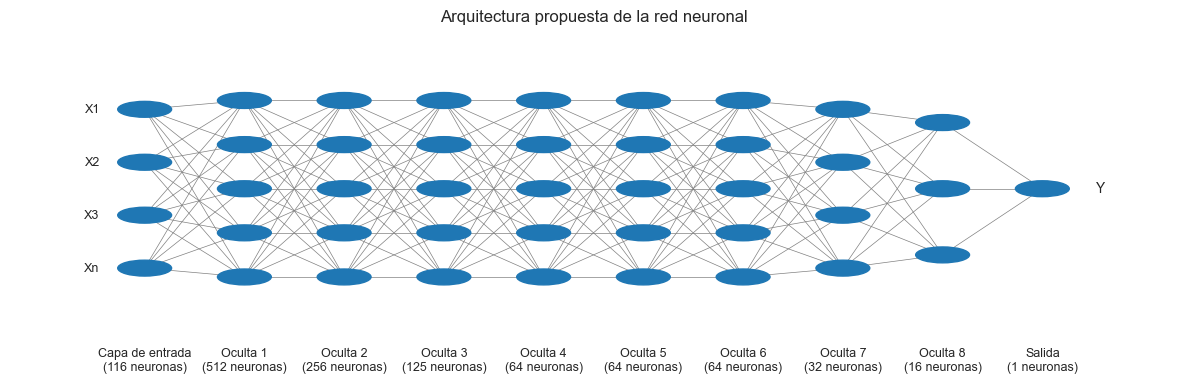

In [84]:
import matplotlib.pyplot as plt

# Arquitectura real
layer_sizes_real = [116, 512, 256, 125, 64, 64, 64, 32, 16, 1]
layer_labels = [
    "Capa de entrada",
    "Oculta 1",
    "Oculta 2",
    "Oculta 3",
    "Oculta 4",
    "Oculta 5",
    "Oculta 6",
    "Oculta 7",
    "Oculta 8",
    "Salida"
]

# Arquitectura "visual" (nº de nodos que vamos a dibujar por capa)
# sólo para que quepa en la figura
layer_sizes_vis = [4, 5, 5, 5, 5, 5, 5, 4, 3, 1]

assert len(layer_sizes_vis) == len(layer_sizes_real) == len(layer_labels)

def draw_nn(layer_sizes_vis, layer_sizes_real, layer_labels):
    fig, ax = plt.subplots(figsize=(12, 4))
    ax.axis("off")

    n_layers = len(layer_sizes_vis)
    x_spacing = 1.0 / (n_layers - 1)

    # Para guardar las posiciones de cada nodo y luego dibujar las conexiones
    layer_nodes = []

    # ---- DIBUJAR NODOS ----
    for i, (n_nodes_vis, n_nodes_real, label) in enumerate(
        zip(layer_sizes_vis, layer_sizes_real, layer_labels)
    ):
        x = i * x_spacing
        y_spacing = 1.0 / (n_nodes_vis + 1)
        nodes_coords = []

        for j in range(n_nodes_vis):
            y = 1.0 - (j + 1) * y_spacing
            circle = plt.Circle((x, y), 0.03, color="#1f77b4", zorder=3)
            ax.add_patch(circle)
            nodes_coords.append((x, y))

        layer_nodes.append(nodes_coords)

        # Texto bajo cada capa con nº real de neuronas
        ax.text(
            x, -0.10,
            f"{label}\n({n_nodes_real} neuronas)",
            ha="center", va="top",
            fontsize=9
        )

    # ---- DIBUJAR CONEXIONES ENTRE CAPAS ADYACENTES ----
    for i in range(n_layers - 1):
        for (x1, y1) in layer_nodes[i]:
            for (x2, y2) in layer_nodes[i+1]:
                ax.plot([x1, x2], [y1, y2], color="gray", linewidth=0.5, zorder=1)

    # Etiquetas tipo X1, X2, ..., Xn en la izquierda
    x0 = 0
    for k, (x_in, y_in) in enumerate(layer_nodes[0]):
        if k == 0:
            label = "X1"
        elif k == 1:
            label = "X2"
        elif k == 2:
            label = "X3"
        elif k == len(layer_nodes[0]) - 1:
            label = "Xn"
        else:
            label = "..."
        ax.text(x0 - 0.05, y_in, label, ha="right", va="center", fontsize=9)

    # Etiquetas de salida (solo 1 en tu caso)
    x_last = (n_layers - 1) * x_spacing
    y_last = layer_nodes[-1][0][1]
    ax.text(x_last + 0.06, y_last, "Y", ha="left", va="center", fontsize=10)

    ax.set_xlim(-0.15, 1.15)
    ax.set_ylim(-0.2, 1.1)
    plt.title("Arquitectura propuesta de la red neuronal", fontsize=12)
    plt.tight_layout()
    plt.show()

draw_nn(layer_sizes_vis, layer_sizes_real, layer_labels)


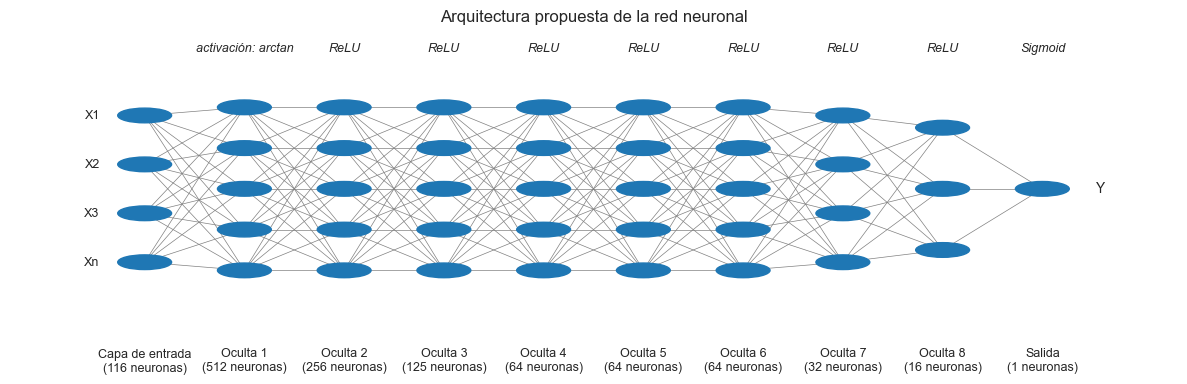

In [85]:
import matplotlib.pyplot as plt

# Arquitectura real
layer_sizes_real = [116, 512, 256, 125, 64, 64, 64, 32, 16, 1]
layer_labels = [
    "Capa de entrada",
    "Oculta 1",
    "Oculta 2",
    "Oculta 3",
    "Oculta 4",
    "Oculta 5",
    "Oculta 6",
    "Oculta 7",
    "Oculta 8",
    "Salida"
]

# Arquitectura "visual" (nº de nodos dibujados por capa)
layer_sizes_vis = [4, 5, 5, 5, 5, 5, 5, 4, 3, 1]

assert len(layer_sizes_vis) == len(layer_sizes_real) == len(layer_labels)

def draw_nn(layer_sizes_vis, layer_sizes_real, layer_labels):
    fig, ax = plt.subplots(figsize=(12, 4))
    ax.axis("off")

    n_layers = len(layer_sizes_vis)
    x_spacing = 1.0 / (n_layers - 1)

    layer_nodes = []

    # ---- DIBUJAR NODOS ----
    for i, (n_nodes_vis, n_nodes_real, label) in enumerate(
        zip(layer_sizes_vis, layer_sizes_real, layer_labels)
    ):
        x = i * x_spacing
        y_spacing = 1.0 / (n_nodes_vis + 1)
        nodes_coords = []

        for j in range(n_nodes_vis):
            y = 1.0 - (j + 1) * y_spacing
            circle = plt.Circle((x, y), 0.03, color="#1f77b4", zorder=3)
            ax.add_patch(circle)
            nodes_coords.append((x, y))

        layer_nodes.append(nodes_coords)

        # Texto bajo cada capa con nº real de neuronas
        ax.text(
            x, -0.15,
            f"{label}\n({n_nodes_real} neuronas)",
            ha="center", va="top",
            fontsize=9
        )

    # ---- DIBUJAR CONEXIONES ENTRE CAPAS ADYACENTES ----
    for i in range(n_layers - 1):
        for (x1, y1) in layer_nodes[i]:
            for (x2, y2) in layer_nodes[i+1]:
                ax.plot([x1, x2], [y1, y2], color="gray", linewidth=0.5, zorder=1)

    # Etiquetas tipo X1, X2, ..., Xn en la izquierda
    x0 = 0
    for k, (x_in, y_in) in enumerate(layer_nodes[0]):
        if k == 0:
            label = "X1"
        elif k == 1:
            label = "X2"
        elif k == 2:
            label = "X3"
        elif k == len(layer_nodes[0]) - 1:
            label = "Xn"
        else:
            label = "..."
        ax.text(x0 - 0.05, y_in, label, ha="right", va="center", fontsize=9)

    # Etiqueta de salida (1 neurona)
    x_last = (n_layers - 1) * x_spacing
    y_last = layer_nodes[-1][0][1]
    ax.text(x_last + 0.06, y_last, "Y", ha="left", va="center", fontsize=10)

    # ---- TEXTOS DE FUNCIONES DE ACTIVACIÓN ----
    # Primera capa oculta: arctan
    x_hidden1 = 1 * x_spacing
    ax.text(
        x_hidden1, 1.05,
        "activación: arctan",
        ha="center", va="bottom",
        fontsize=9, fontstyle="italic"
    )

    # Resto de capas ocultas: ReLU
    # (desde la segunda capa oculta hasta la octava)
    for i in range(2, n_layers-1):  # capas 2..8 (índices 2..8)
        x_layer = i * x_spacing
        ax.text(
            x_layer, 1.05,
            "ReLU",
            ha="center", va="bottom",
            fontsize=9, fontstyle="italic"
        )

    # Capa de salida: Sigmoid
    ax.text(
        x_last, 1.05,
        "Sigmoid",
        ha="center", va="bottom",
        fontsize=9, fontstyle="italic"
    )

    ax.set_xlim(-0.15, 1.15)
    ax.set_ylim(-0.25, 1.15)
    plt.title("Arquitectura propuesta de la red neuronal", fontsize=12)
    plt.tight_layout()
    plt.show()

draw_nn(layer_sizes_vis, layer_sizes_real, layer_labels)
